# Plotting

### Content

+ [1. Notebook description](#1.-Notebook-Description)
+ [2. Helper Functions](#2.-Helper-Functions)
+ [3. Model Comparison](#3.-Model-Comparison)
+ [4. Model Group Comparison](#4.-Model-Group-Comparison)
+ [5. Subject Comparison](#5.-Subject-Comparison)
+ [6. Digit Comparison](#6.-Digit-Comparison)
+ [7. Individual vs Pooled Comparison](#7.-Individual-vs-Pooled-Comparison)
---

# 1. Notebook Description


This is the the main notebook for all data plotting and data description. I will dive down into the individual data representations:

+ starting with a global model comparison (models vs subject mean)
+ individual group comparisons (
+ subject comparison for the best model (subjects vs individual digit combinations)
+ digit comparisons for the 2 best subjects and 2 worst subjct (digit vs digit)

Interleaved are some data frame selections and descriptive inspections using `psych::describe` and `aggregate`.

---

**Imports:**

In [6]:
library(psych)
library(ggplot2)
library(ggthemes)
library(reshape2)
library(xtable)
library(IRdisplay)


Attaching package: ‘ggplot2’

The following objects are masked from ‘package:psych’:

    %+%, alpha


Attaching package: ‘IRdisplay’

The following object is masked from ‘package:xtable’:

    display



# 2. Helper Functions

In [7]:
# clean some fields, add model names and factorize subject names
clean_df <- function(df){
    df$group <- sapply(df$type, function(x){
        unlist(strsplit(as.character(x), "_"))[1]
    })
    df$subject <- factor(df$subject)
    df <- add_names(df)
    df
}

# generate model names and add them to the data frame
add_names <- function(df){
    df$modelname <- factor(df$type, labels=paste('M', 1:length(sort(unique(df$type))), sep=''))
    df
}

# mirror a matrix (used for RDM plots in digit comparison)
mirror <- function(df, generic=FALSE) {
    if(generic){
        dfm <- df[0,]
        for(rowix in 1:nrow(df))
        {
            row <- df[rowix,]
            dfm[rowix,] <- row
            dfm[rowix+nrow(df),] <- row
            dfm[rowix+nrow(df),]$d2 <- dfm[rowix,]$d1
            dfm[rowix+nrow(df),]$d1 <- dfm[rowix,]$d2
        }      
    } else {
        dfm <- data.frame(d1=numeric(0), d2=numeric(0), score=numeric(0), subject=numeric(0))
        for(rowix in 1:nrow(df))
        {
            row <- df[rowix,]
            dfm[rowix,] <- c(row$d1, row$d2, round(row$score, 2), row$subject)
            dfm[rowix+nrow(df),] <- c(row$d2, row$d1, round(row$score, 2), row$subject)
        }    
    }
    dfm
}

---
# 3. Model Comparison

Compare all models against each other, highlighting their group affinity.
Each point will be the mean accuracy for a single subject. The "cv" facet lists the highest CV-score and the "final" facet the score from the single test on the holdout data.

### Data

Filter data and print some output to validate what we're doing.

In [71]:
if(!exists('dfvanilla')){ dfvanilla <- read.csv('all_results.csv') }

In [72]:
# take the best CV-score as this makes up the best model
df <- aggregate(score ~ subject+type+d1+d2+test, data=dfvanilla, FUN=max)
df[df$subject=='3130' & df$type == 'cspflatlda_ss10_201_1200_raw' & df$d1 == 0 & df$d2 %in% c(1,2), ]
df <- clean_df(df)

# now add group to aggregate and take the mean over all d1/d2
df <- aggregate(score ~ subject+type+group+test+modelname, data=df, FUN=mean)

subject type                         d1 d2 test  score    
1     3130    cspflatlda_ss10_201_1200_raw 0  1  cv    0.8084034
1279  3130    cspflatlda_ss10_201_1200_raw 0  2  cv    0.7328179
57511 3130    cspflatlda_ss10_201_1200_raw 0  1  final 0.7969925
58789 3130    cspflatlda_ss10_201_1200_raw 0  2  final 0.8538462

In [73]:
df[df$subject == '3130' & df$group == 'cspflatlda', ]

subject type                                                group     
1   3130    cspflatlda_ss10_201_1200_raw                        cspflatlda
33  3130    cspflatlda_ss10_201_1200_raw                        cspflatlda
65  3130    cspflatlda_ss10_201_600_raw                         cspflatlda
97  3130    cspflatlda_ss10_201_600_raw                         cspflatlda
129 3130    cspflatlda_ss20_201_1200_raw                        cspflatlda
161 3130    cspflatlda_ss20_201_1200_raw                        cspflatlda
193 3130    cspflatlda_ss20_201_600_raw                         cspflatlda
225 3130    cspflatlda_ss20_201_600_raw                         cspflatlda
257 3130    cspflatlda_ss2_201_1200_fft_None_200_40bins_nopower cspflatlda
289 3130    cspflatlda_ss2_201_1200_fft_None_200_40bins_nopower cspflatlda
321 3130    cspflatlda_ss2_201_1200_fft_None_200_40bins_power   cspflatlda
353 3130    cspflatlda_ss2_201_1200_fft_None_200_40bins_power   cspflatlda
385 3130    cspflatlda_ss2_201_700_fft_None_200_40bins_nopower  cspflatlda
417 3130    cspflatlda_ss2_201_700_fft_None_200_40bins_nopower  cspflatlda
449 3130    cspflatlda_ss2_201_700_fft_None_200_40bins_power    cspflatlda
481 3130    cspflatlda_ss2_201_700_fft_None_200_40bins_power    cspflatlda
513 3130    cspflatlda_ss4_201_1200_fft_None_80_40bins_nopower  cspflatlda
545 3130    cspflatlda_ss4_201_1200_fft_None_80_40bins_nopower  cspflatlda
577 3130    cspflatlda_ss4_201_1200_fft_None_80_40bins_power    cspflatlda
609 3130    cspflatlda_ss4_201_1200_fft_None_80_40bins_power    cspflatlda
641 3130    cspflatlda_ss4_201_700_fft_None_80_40bins_nopower   cspflatlda
673 3130    cspflatlda_ss4_201_700_fft_None_80_40bins_nopower   cspflatlda
705 3130    cspflatlda_ss4_201_700_fft_None_80_40bins_power     cspflatlda
737 3130    cspflatlda_ss4_201_700_fft_None_80_40bins_power     cspflatlda
    test  modelname score    
1   cv    M1        0.6541934
33  final M1        0.6585336
65  cv    M2        0.7246105
97  final M2        0.7153518
129 cv    M3        0.6525382
161 final M3        0.6478039
193 cv    M4        0.7118069
225 final M4        0.7114311
257 cv    M5        0.5642179
289 final M5        0.5457935
321 cv    M6        0.5398662
353 final M6        0.5138449
385 cv    M7        0.7579024
417 final M7        0.7530541
449 cv    M8        0.6061829
481 final M8        0.5980657
513 cv    M9        0.5654692
545 final M9        0.5480909
577 cv    M10       0.5347606
609 final M10       0.5149849
641 cv    M11       0.7682346
673 final M11       0.7693937
705 cv    M12       0.6035346
737 final M12       0.5907370

In [74]:
dflatex <- unique(df[,c('type','modelname')])
dflatex
#print(xtable(dflatex), include.rownames=FALSE)

type                                                modelname
1    cspflatlda_ss10_201_1200_raw                        M1       
65   cspflatlda_ss10_201_600_raw                         M2       
129  cspflatlda_ss20_201_1200_raw                        M3       
193  cspflatlda_ss20_201_600_raw                         M4       
257  cspflatlda_ss2_201_1200_fft_None_200_40bins_nopower M5       
321  cspflatlda_ss2_201_1200_fft_None_200_40bins_power   M6       
385  cspflatlda_ss2_201_700_fft_None_200_40bins_nopower  M7       
449  cspflatlda_ss2_201_700_fft_None_200_40bins_power    M8       
513  cspflatlda_ss4_201_1200_fft_None_80_40bins_nopower  M9       
577  cspflatlda_ss4_201_1200_fft_None_80_40bins_power    M10      
641  cspflatlda_ss4_201_700_fft_None_80_40bins_nopower   M11      
705  cspflatlda_ss4_201_700_fft_None_80_40bins_power     M12      
769  knn_ss20_201_1200_raw                               M13      
833  knn_ss20_201_600_raw                                M14      
897  knn_ss4_201_1200_fft_None_80_40bins_nopower         M15      
961  knn_ss4_201_700_fft_None_80_40bins_nopower          M16      
1025 lda_ss10_201_1200_raw                               M17      
1085 lda_ss10_201_600_raw                                M18      
1149 lda_ss20_201_1200_raw                               M19      
1213 lda_ss20_201_600_raw                                M20      
1277 lda_ss2_201_1200_fft_None_200_40bins_nopower        M21      
1341 lda_ss2_201_1200_fft_None_200_40bins_power          M22      
1405 lda_ss2_201_700_fft_None_200_40bins_nopower         M23      
1469 lda_ss2_201_700_fft_None_200_40bins_power           M24      
1533 lda_ss4_201_1200_fft_None_80_40bins_nopower         M25      
1597 lda_ss4_201_1200_fft_None_80_40bins_power           M26      
1661 lda_ss4_201_700_fft_None_80_40bins_nopower          M27      
1725 lda_ss4_201_700_fft_None_80_40bins_power            M28      
1789 svc_ss10_201_1200_raw                               M29      
1853 svc_ss10_201_600_raw                                M30      
1917 svc_ss20_201_1200_raw                               M31      
1981 svc_ss20_201_600_raw                                M32      
2045 svc_ss2_201_1200_fft_None_200_40bins_nopower        M33      
2109 svc_ss2_201_1200_fft_None_200_40bins_power          M34      
2173 svc_ss2_201_700_fft_None_200_40bins_nopower         M35      
2237 svc_ss2_201_700_fft_None_200_40bins_power           M36      
2301 svc_ss4_201_1200_fft_None_80_40bins_nopower         M37      
2365 svc_ss4_201_1200_fft_None_80_40bins_power           M38      
2429 svc_ss4_201_700_fft_None_80_40bins_nopower          M39      
2493 svc_ss4_201_700_fft_None_80_40bins_power            M40

### Plot

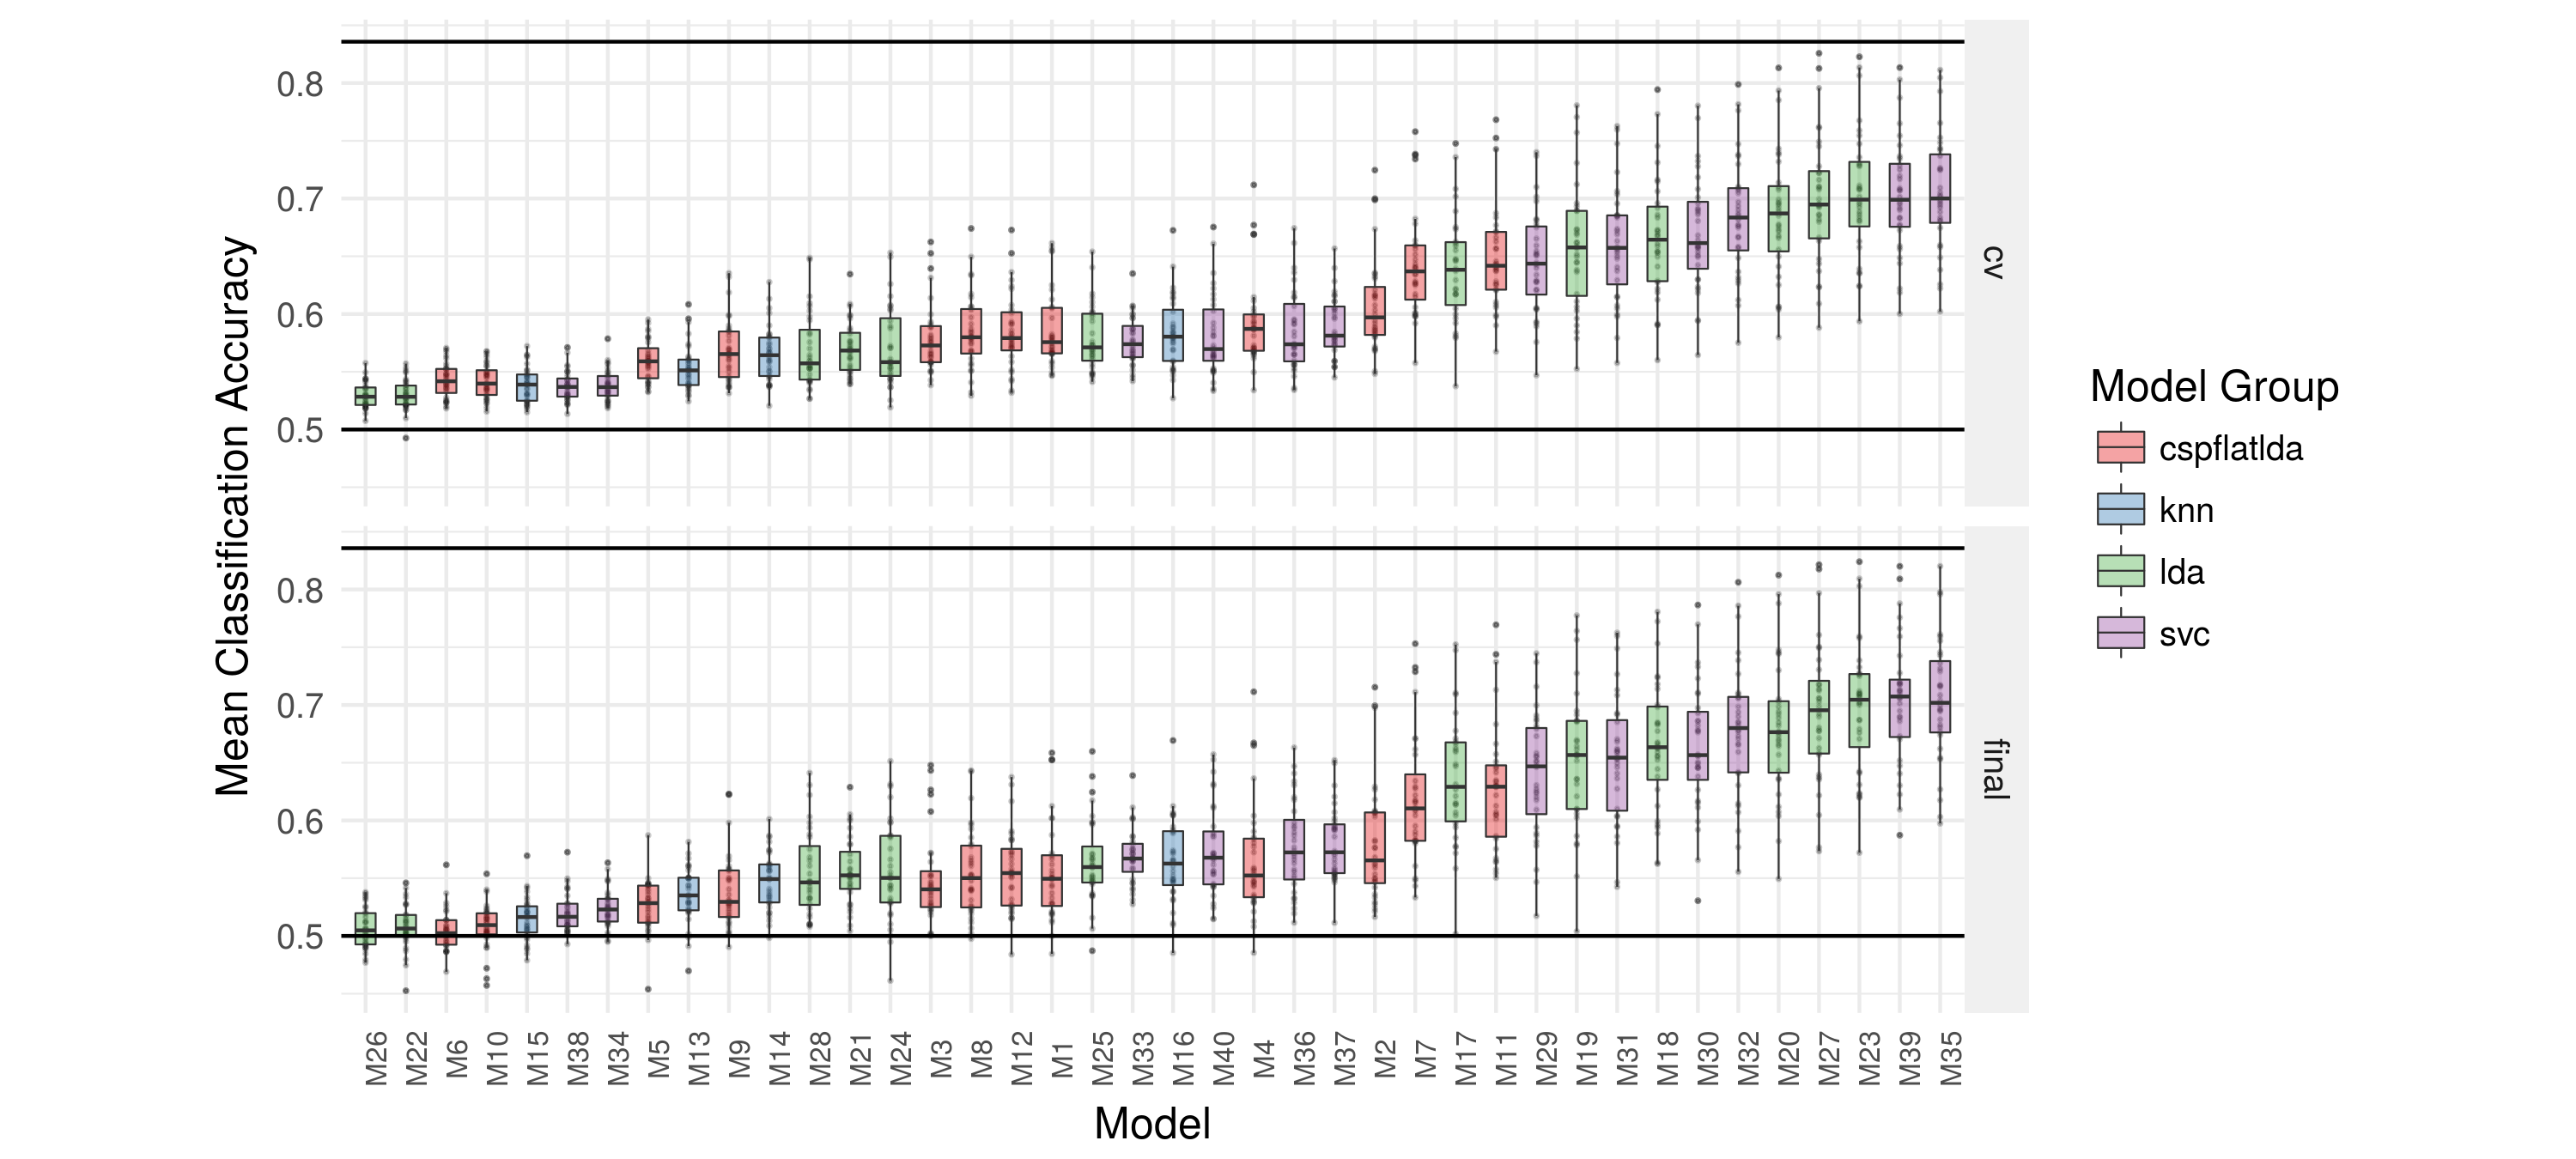

In [75]:
p <- ggplot(data=df, aes(x=reorder(modelname, +score), y=score)) +
  geom_point(color='black', size=0.2, alpha=0.2) +
  geom_boxplot(aes(fill=group), outlier.size = NULL, alpha=0.4, width=0.5, size=0.25) +
  scale_y_continuous(limits=c(min(df$score),max(df$score)+0.01), breaks=seq(0.5,1.0,0.1)) +
  scale_fill_brewer(type='qual', palette = "Set1", name='Model Group') +
  facet_grid(test~.) +
  geom_hline(yintercept = max(df$score)+0.01) +
  geom_hline(yintercept = 0.5) +
  labs(x='Model',
       y='Mean Classification Accuracy')+
       #title='Model performance for all subjects') +
  theme_minimal() +
  theme(text = element_text(size=12),
        axis.text.x = element_text(angle=90, hjust=0.5, size=8),
        strip.background = element_rect(fill='#f0f0f0', linetype='blank'),
        aspect.ratio=30/100)
        

# workaround to set dpi of image in preview
ggsave("plots/all_results.pdf", plot = p, width = 10, height = 4.5, dpi=300)
ggsave("plots/all_results.png", plot = p, width = 10, height = 4.5, dpi=300)
display_png(file="plots/all_results.png")

---
# 4. Model Group Comparison

Dive down into each group highlight the individual subjects this time.<br>
Also, name the models so we can take the best one in the next step.


In [76]:
if(!exists('dfvanilla')){ dfvanilla <- read.csv('all_results.csv') }

Without "+kernel" we are taking the best kernel for a label combination here, because the first aggregation is max()
If we were to add the kernel type to the aggregation, the next step would then average both kernel values.

In [77]:
df <- aggregate(score ~ subject+type+d1+d2+test, data=dfvanilla, FUN=max)
df <- aggregate(score ~ subject+type+test, data=df, FUN=mean)
df <- clean_df(df)

[1] subject   type      test      score     group     modelname
<0 rows> (or 0-length row.names)
[1] "cspflatlda"


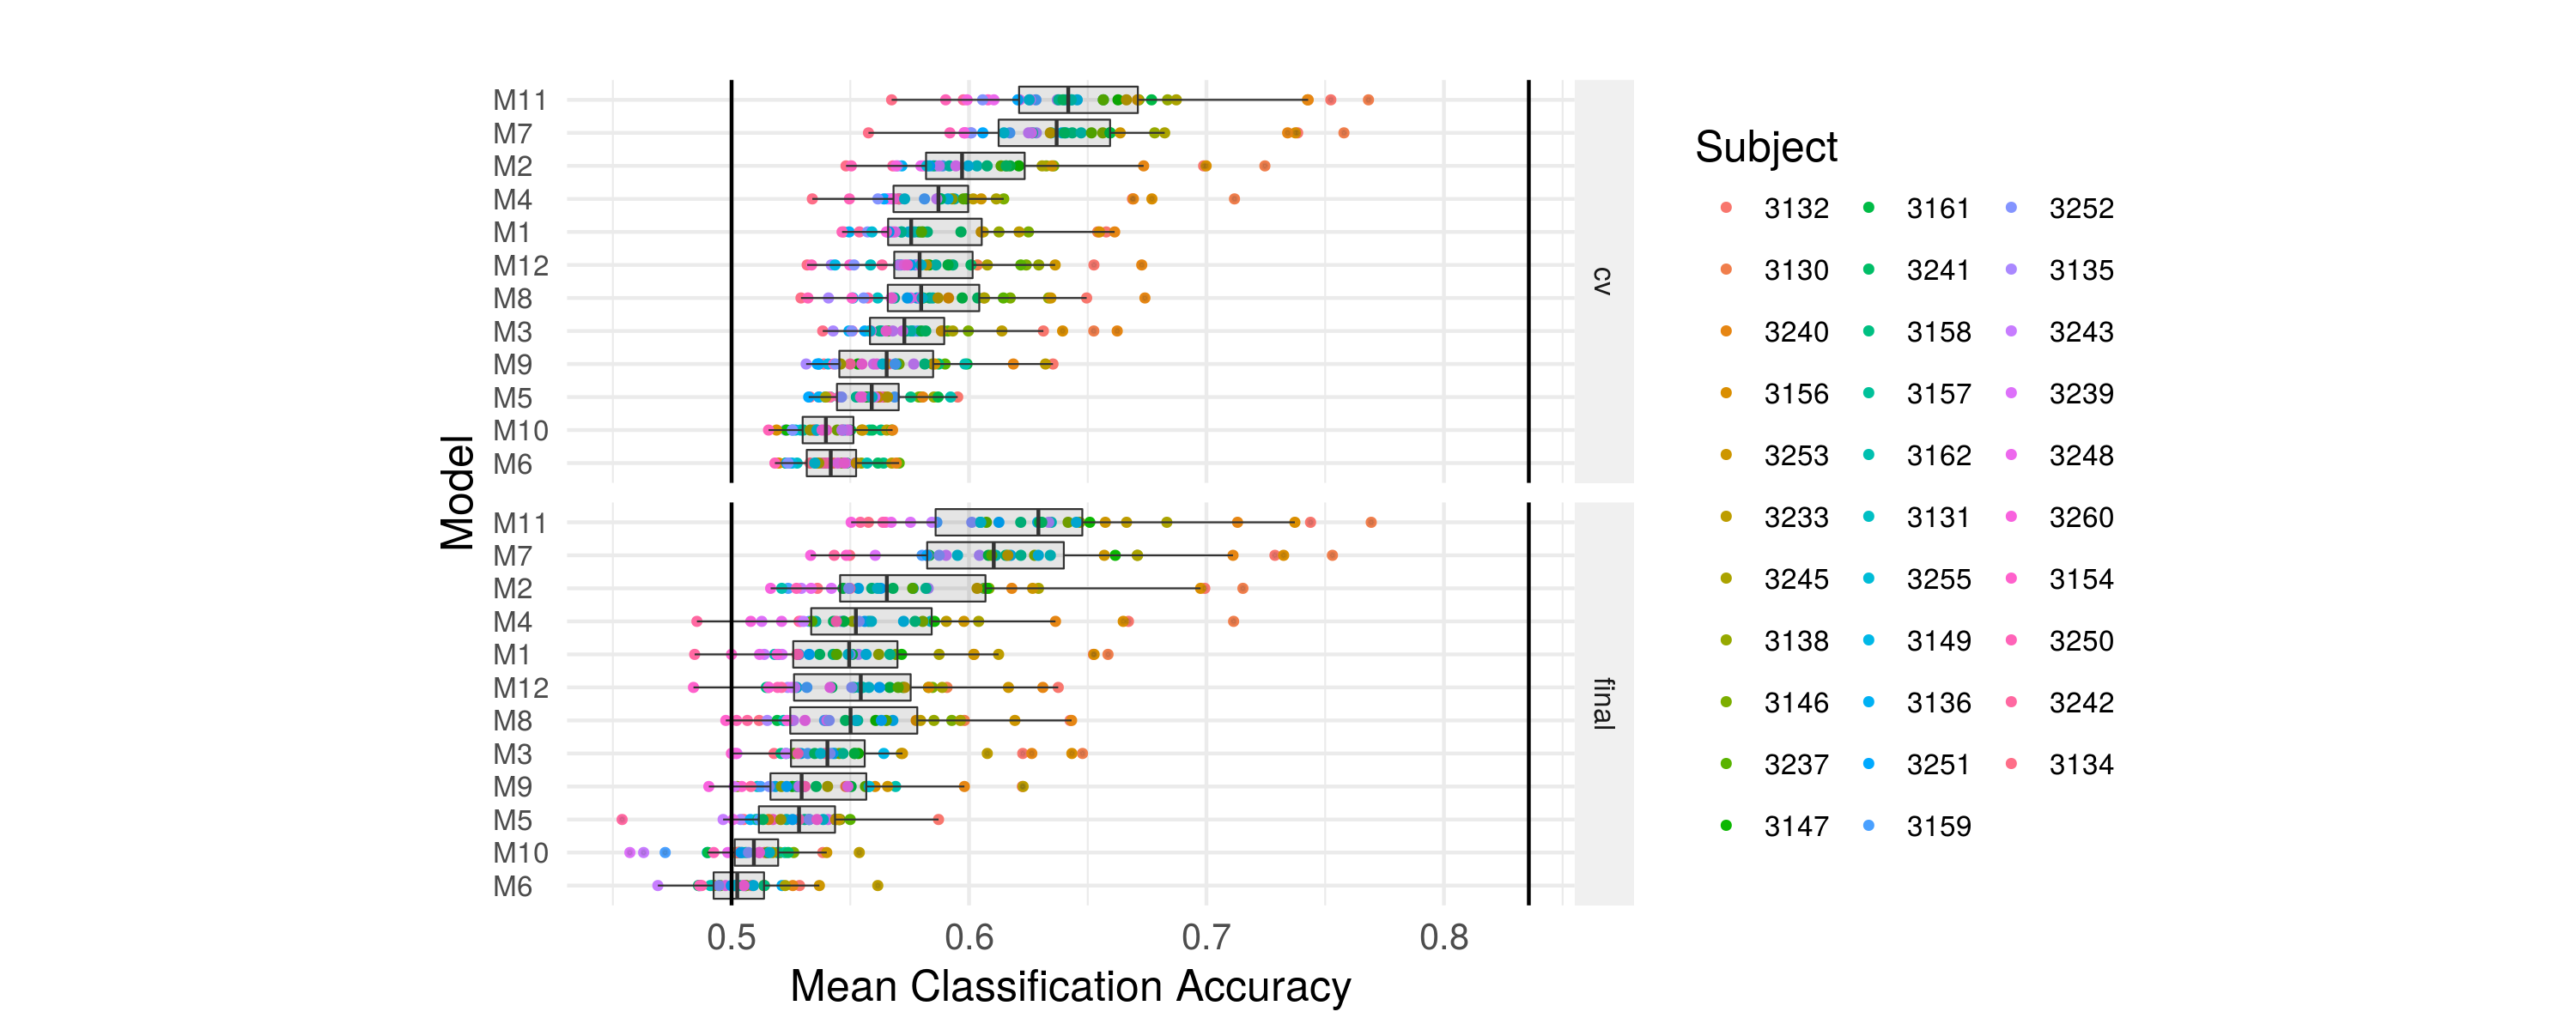

[1] subject   type      test      score     group     modelname
<0 rows> (or 0-length row.names)
[1] "knn"


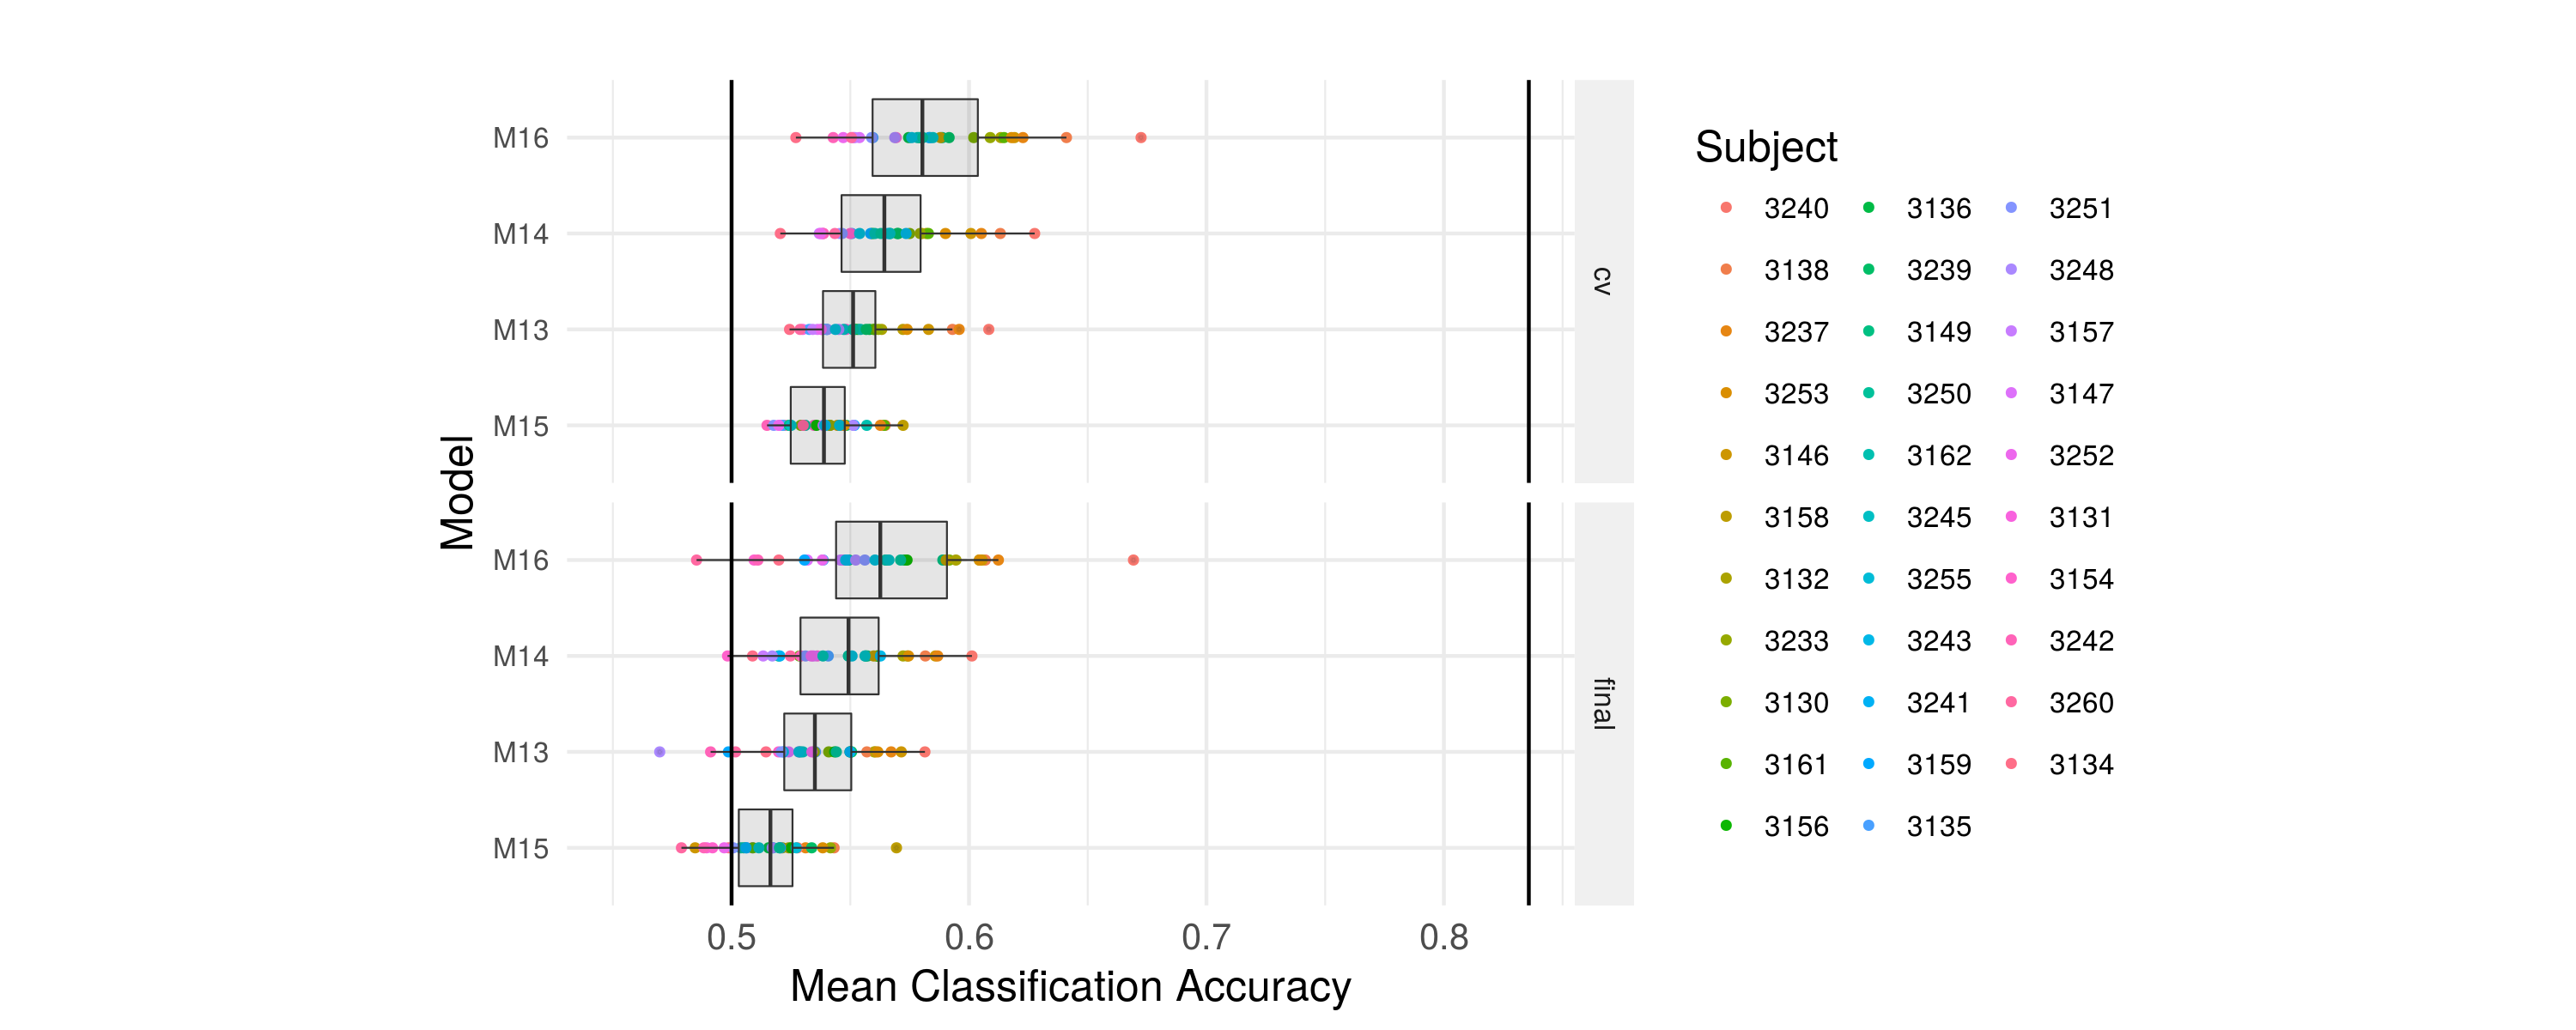

[1] subject   type      test      score     group     modelname
<0 rows> (or 0-length row.names)
[1] "lda"


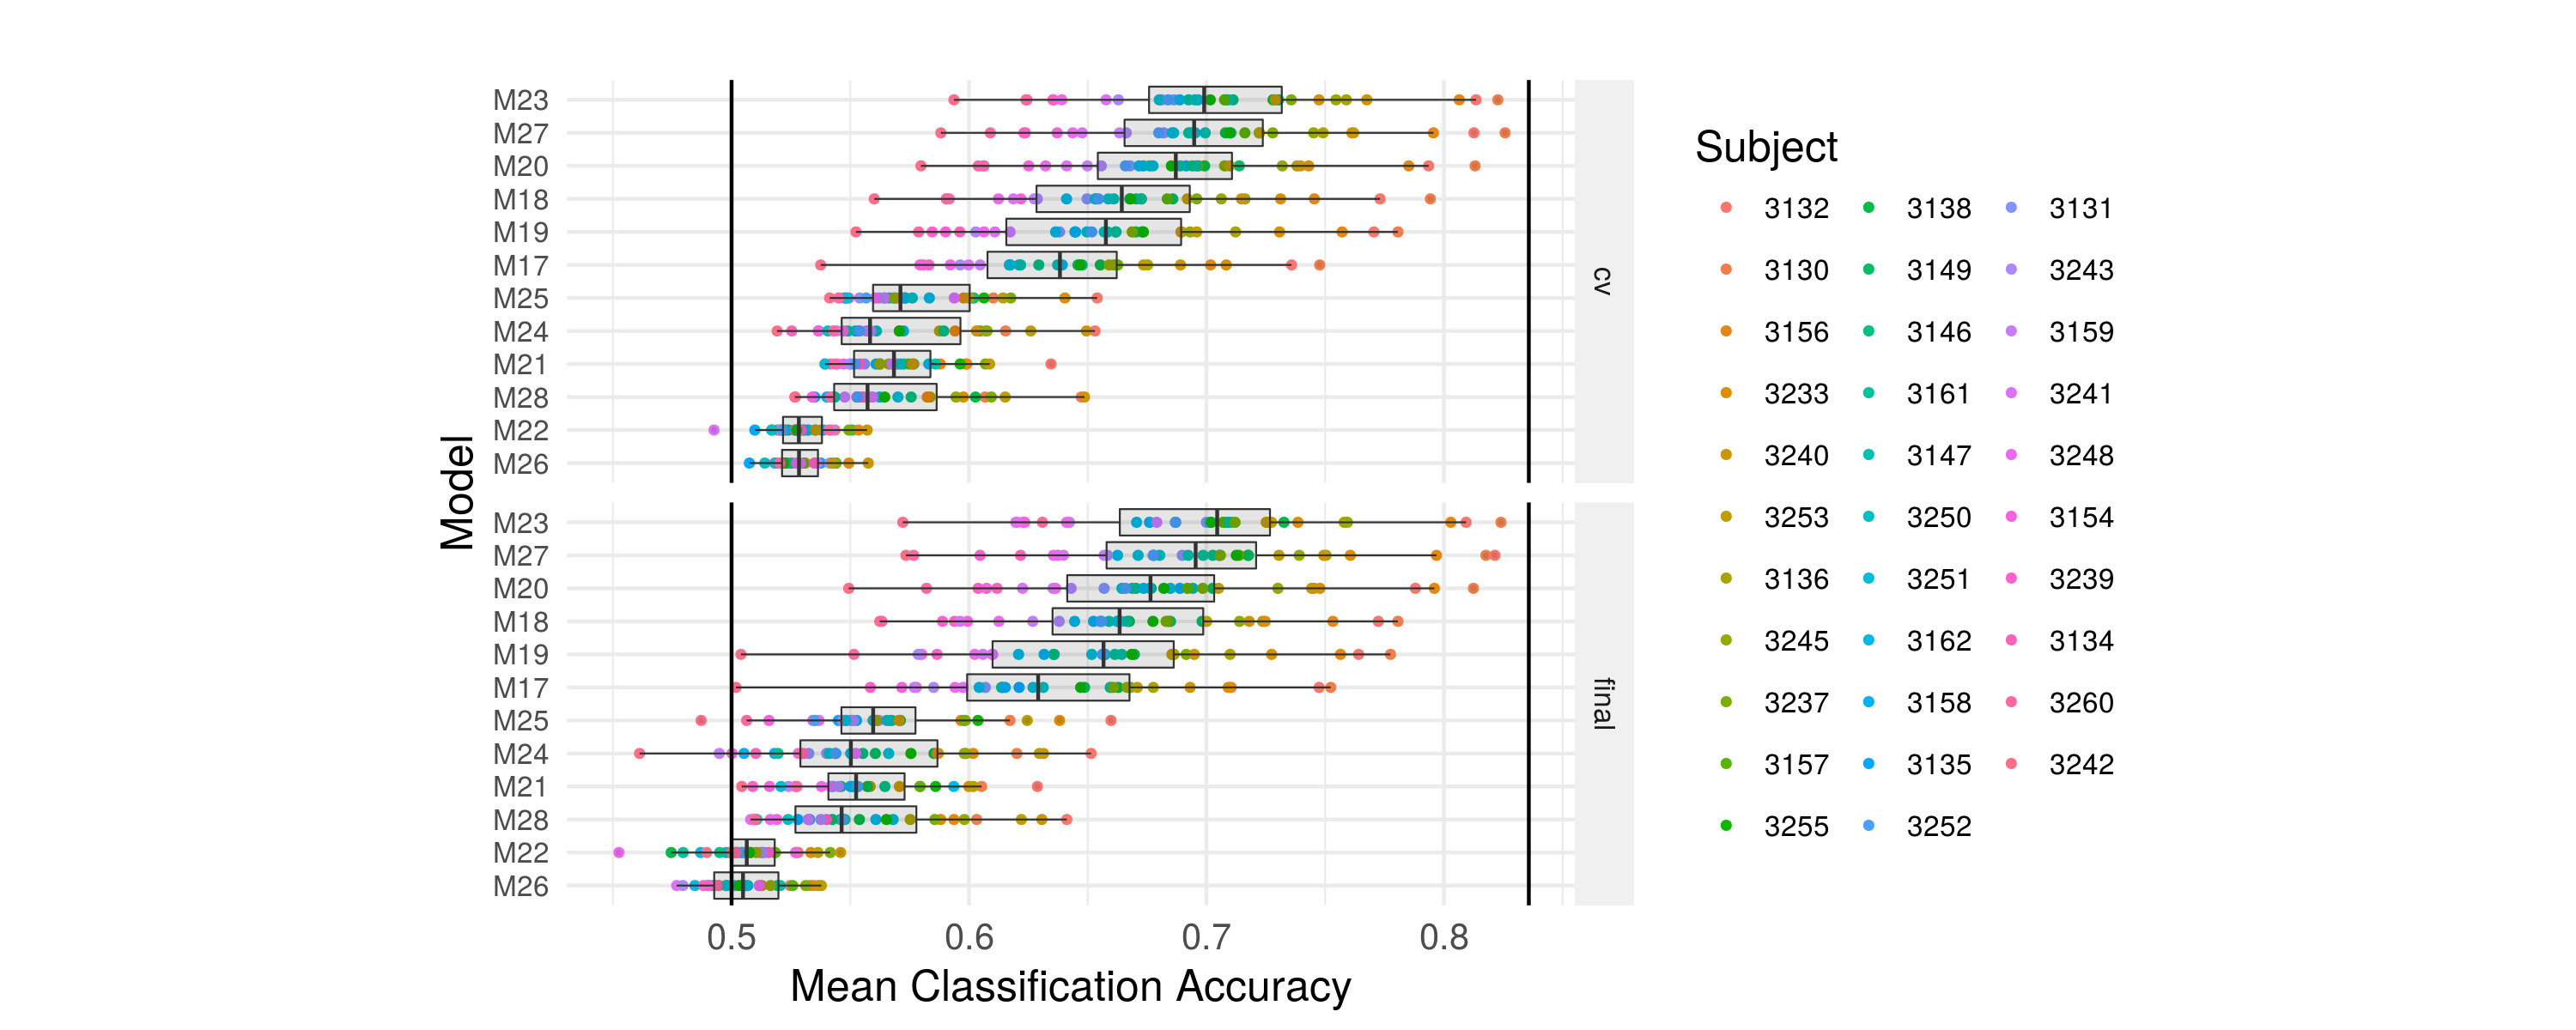

     subject                                        type  test     score group
1109    3242 svc_ss2_201_700_fft_None_200_40bins_nopower    cv 0.6021254   svc
2387    3242 svc_ss2_201_700_fft_None_200_40bins_nopower final 0.5973735   svc
     modelname
1109       M35
2387       M35
[1] "svc"


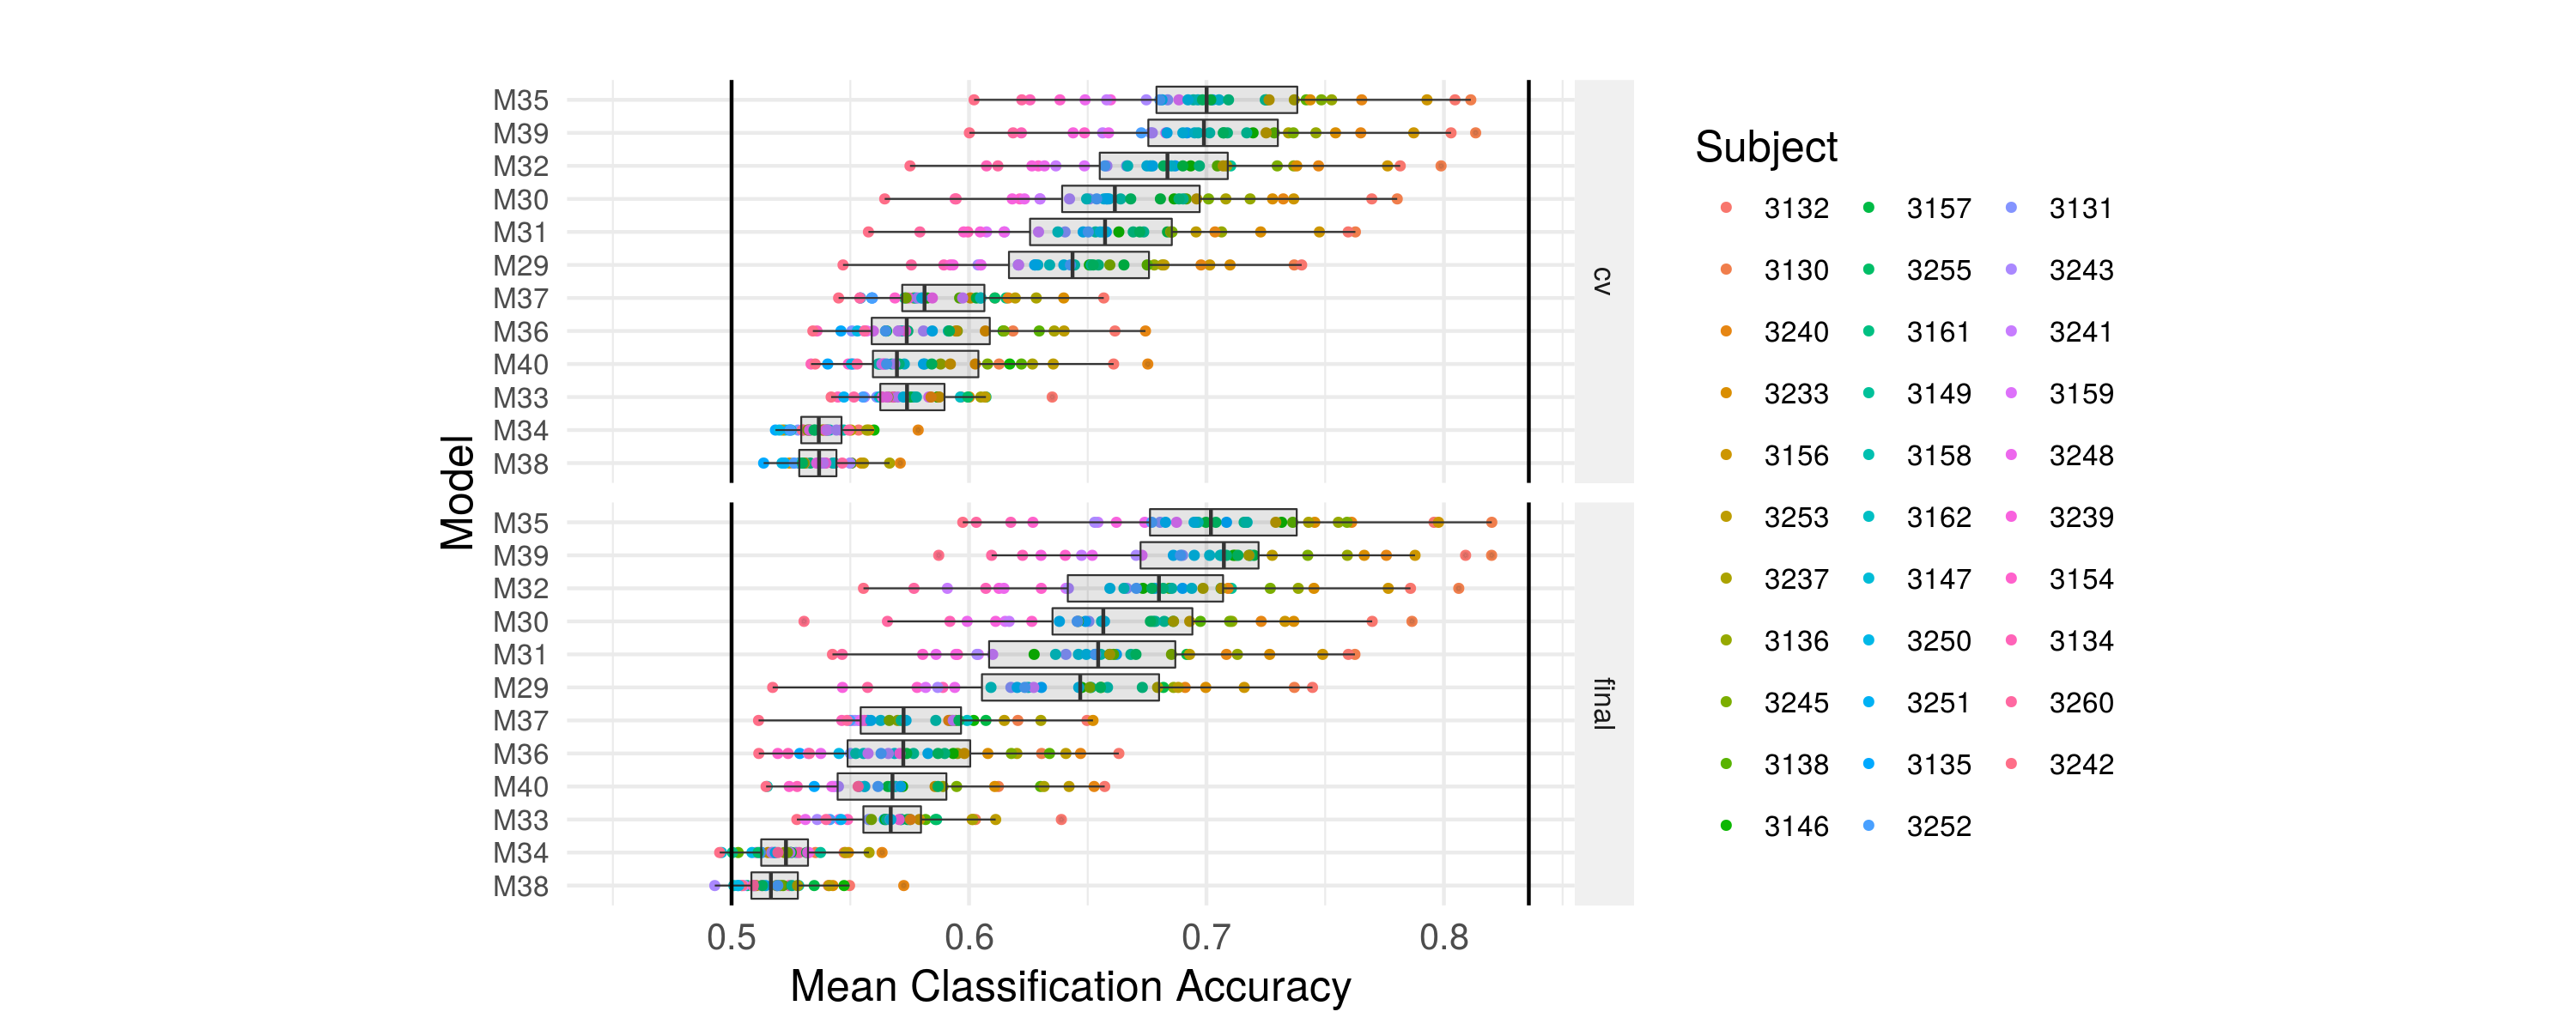

In [78]:
maxscore <- max(df$score)
minscore <- min(df$score)

for(group in unique(df$group)){
    dftmp <- df[df$group == group, ]
    dftmp$type <- sapply(dftmp$type, function(x){ gsub('\n','_',x) })
    print(dftmp[dftmp$subject == '3242' & dftmp$modelname=='M35',])
    nummodels <- length(unique(dftmp$type))

    p <- ggplot(data=dftmp, aes(x=reorder(modelname, +score), y=score)) +
      geom_point(aes(color=reorder(subject, -score)), size=0.8, alpha=1.0) +
      geom_boxplot(fill='black', outlier.size = NULL, alpha=0.1, width=0.8, size=0.25) +
      scale_y_continuous(limits=c(0.45, maxscore + 0.01),
                         breaks=seq(0.5,0.9,0.1)) +
      scale_fill_brewer(type='qual', palette = "Set1", guide=FALSE) +
      scale_color_discrete(name='Subject') +
      guides(color = guide_legend(ncol = 3)) +
      geom_hline(yintercept = maxscore + 0.01) +
      geom_hline(yintercept = 0.5) +
      labs(title='',
           #title=paste('Model performance in group:', toupper(group)),
           x='Model',
           y='Mean Classification Accuracy') +
      theme_minimal() +
      theme(text = element_text(size=10),
            title = element_text(size=12),
            axis.text.x = element_text(size=10),
            axis.text.y = element_text(angle=0, hjust=0, size=8),
            strip.background = element_rect(fill='#f0f0f0', linetype='blank'),
            #axis.text.x=element_blank()) +
            aspect.ratio=40/100) +
      coord_flip() +
      facet_grid(test~.)

    print(group)
    # workaround to set dpi of image in preview
    ggsave(paste('plots/',group,".pdf",sep=''), plot = p, width = 10, height = 4, dpi=300)
    ggsave(paste('plots/',group,".png",sep=''), plot = p, width = 10, height = 4, dpi=300)
    display_png(file=paste('plots/',group,".png",sep=''))
}

## Inspection

In [ ]:
# mean kernel
#df <- aggregate(score ~ subject+type+d1+d2+test+kernel, data=dfvanilla, FUN=max)
# best kernel
df <- aggregate(score ~ subject+type+d1+d2+test, data=dfvanilla, FUN=max)

df <- aggregate(score ~ subject+type+test, data=df, FUN=mean)

df <- clean_df(df)
group <- 'knn'

#### Describe a group

In [ ]:
dff  = df[df$group == group & df$test =='final',]
dfcv = df[df$group == group & df$test =='cv',]

In [ ]:
describe(dff$score)
describe(dfcv$score)

#### best/worst subject globally

In [ ]:
head(dfcv[with(dfcv, order(-score)), ],1)
head(dff[with(dff, order(-score)), ],1)

#### best/worst subjects by mean over all models

In [ ]:
dft <- aggregate(score ~ subject, data=dff, FUN=mean)
head(dft[with(dft, order(+score)), ],6)
dft <- aggregate(score ~ subject, data=dfcv, FUN=mean)
head(dft[with(dft, order(+score)), ],6)

In [ ]:
dft <- aggregate(score ~ subject, data=rbind(dff, dfcv), FUN=mean)
head(dft[with(dft, order(+score)), ],5)

---

### for a specific model


In [ ]:
model <- 'M16'

In [ ]:
dfcv <- df[df$group == group & df$modelname==model & df$test =='cv' ,]
dff  <- df[df$group == group & df$modelname==model & df$test =='final',]
describe(dff$score)
describe(dfcv$score)

In [ ]:
dfsvc <- df[df$group == group & df$modelname==model, ]

In [ ]:
df <- aggregate(score ~ subject+type+d1+d2+test+kernel, data=dfvanilla, FUN=max)
df <- aggregate(score ~ subject+type+test+kernel, data=df, FUN=mean)
df <- clean_df(df)
dfcv <- df[df$group == group & df$modelname==model & df$test =='cv' ,]
dff  <- df[df$group == group & df$modelname==model & df$test =='final',]


dfflin <- dff[dff$kernel == 'linear', ]
dffrbf <- dff[dff$kernel == 'rbf', ]
all(dfflin$subject == dffrbf$subject)
all((dfflin$score - dffrbf$score) > 0)
mean(dfflin$score - dffrbf$score)
sd(dfflin$score - dffrbf$score)

dfcvlin <- dfcv[dfcv$kernel == 'linear', ]
dfcvrbf <- dfcv[dfcv$kernel == 'rbf', ]
all(dfcvlin$subject == dfcvrbf$subject)
all((dfcvlin$score - dfcvrbf$score) > 0)
mean(dfcvlin$score - dfcvrbf$score)
sd(dfcvlin$score - dfcvrbf$score)

In [ ]:
head(dff[with(dff, order(-score)), ],10)

In [ ]:
head(dfcv[with(dfcv, order(-score)), ],10)

---
### subject scores

within a specific model, describe a subject

In [ ]:
model <- 'M16'
subject <- '3240'
kernel <- 'none'
dff  = df[df$test =='final' & df$modelname==model & df$subject==subject & df$kernel==kernel,]
dfcv = df[df$test =='cv'    & df$modelname==model & df$subject==subject & df$kernel==kernel ,]

In [ ]:
describe(dff$score)
describe(dfcv$score)

---
# 5. Subject Comparison

In [79]:
if(!exists('dfvanilla')){ dfvanilla <- read.csv('all_results.csv') }

In [80]:
plot_model <- function(dftmp, name, modelid, no_guide=FALSE){
  numk <- length(unique(dftmp$kernel))
  print_guide <- ifelse(numk > 1, 'legend', FALSE)
  print_guide <- ifelse(no_guide, FALSE, print_guide)
  ggplot(data=dftmp, aes(x=reorder(subject, +score), y=score, fill=kernel)) +
    geom_boxplot(outlier.size = 0, alpha=0.3, color='#808090', width=0.4*numk) +
    geom_point(aes(color=kernel), size=0.5, alpha=0.6, position=position_dodge(width=0.8)) +
    #facet_wrap(~type, ncol=1) +
    scale_y_continuous(limits=c(min(dftmp$score), 1.0),
                                breaks=seq(0.5,1.0,0.1)) +
    scale_color_brewer(type='qual', palette = "Set1", guide=print_guide)+
    scale_fill_brewer(type='qual', palette = "Set1", guide=print_guide)+
    geom_hline(yintercept = 0.5) +
    geom_hline(yintercept = 1.0) +
    facet_grid(test~.) +
    labs(kernel='',
         x='Subject ID',
         y='Classification Accuracy',
         title=modelid) +
         #title=paste('Subject comparison for best', toupper(name), 'model')) +
    #title='SVM: linear and rbf kernel\n(best cross-validated models for each digit combination)') +
    theme_minimal() +
    theme(text = element_text(size=12),
          axis.text.x = element_text(angle=45, hjust=1),
          aspect.ratio=2.0/10,
          plot.title = element_text(hjust = 0.5),
          strip.background = element_rect(fill='#f0f0f0', linetype='blank'),
          plot.margin=unit(c(0,0,0,0),"mm"))
}

In [81]:
models <- c('M11', 'M16', 'M23', 'M35')

[1] "M11"
[1] "cspflatlda"


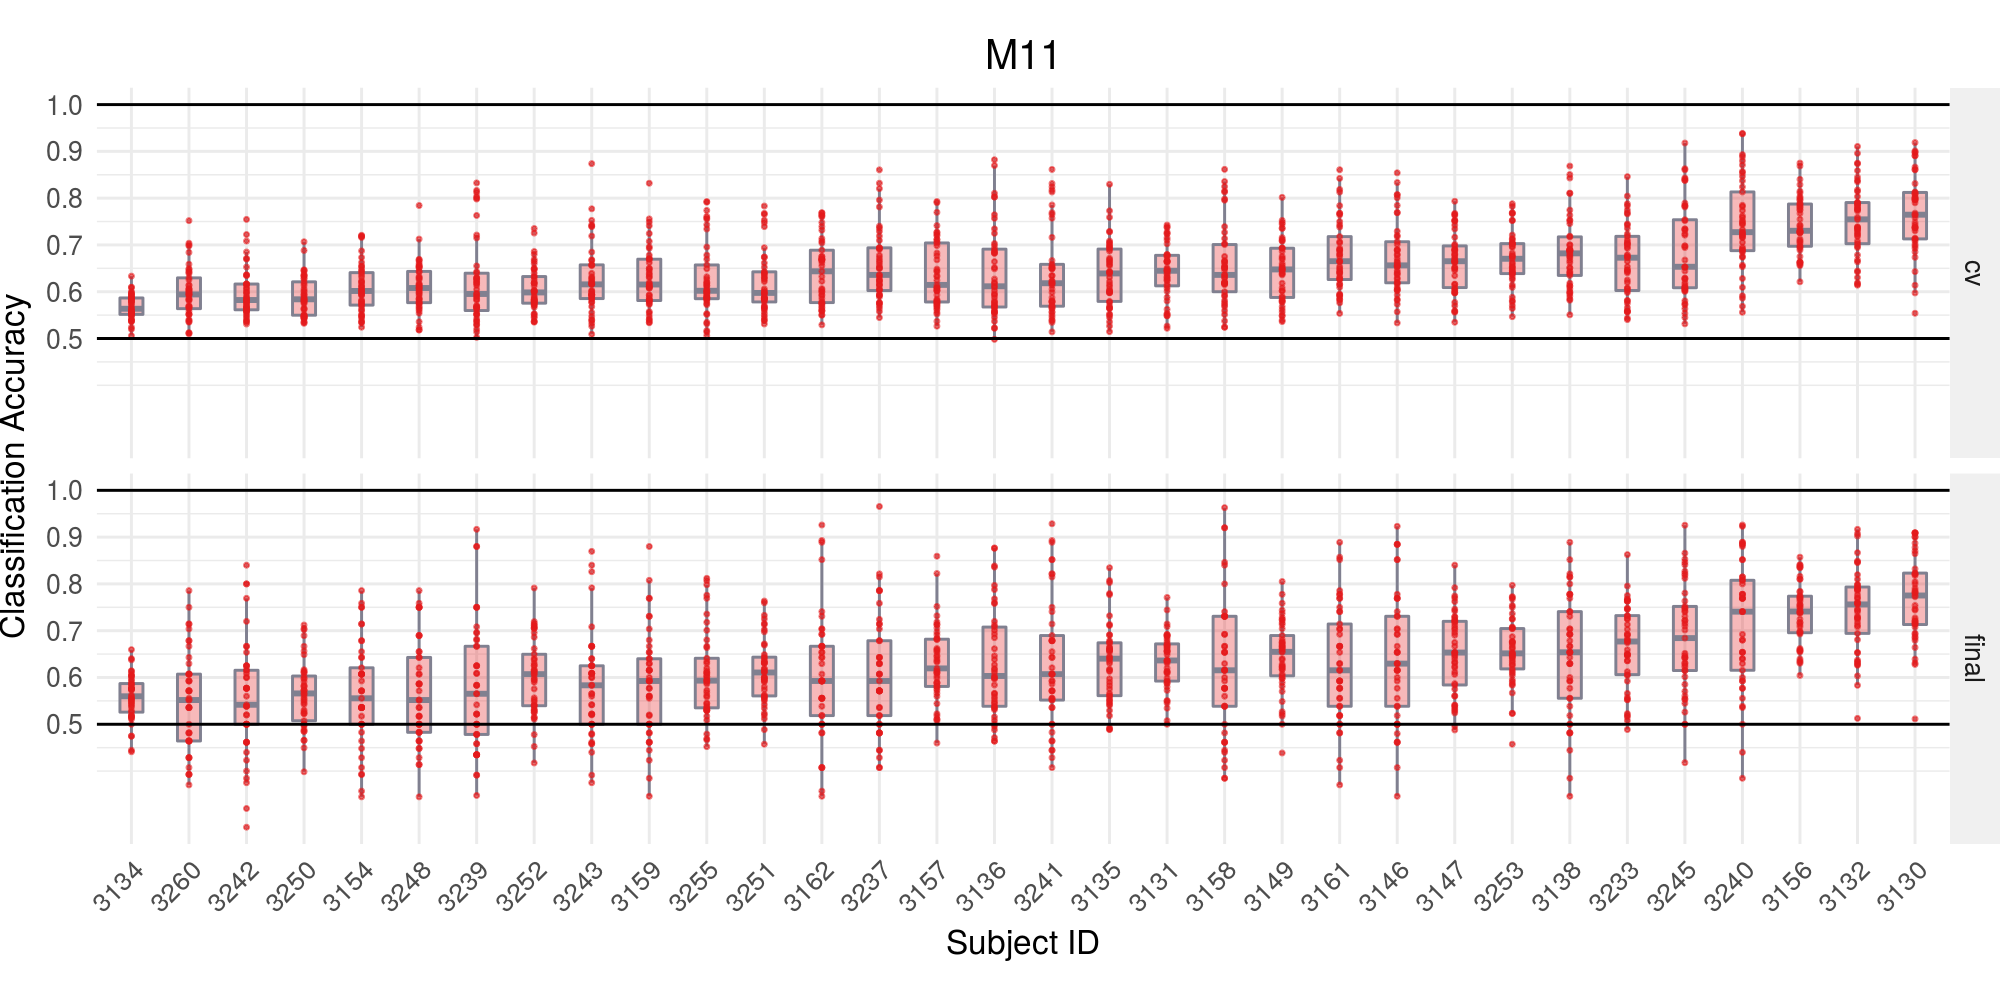

[1] "M16"
[1] "knn"


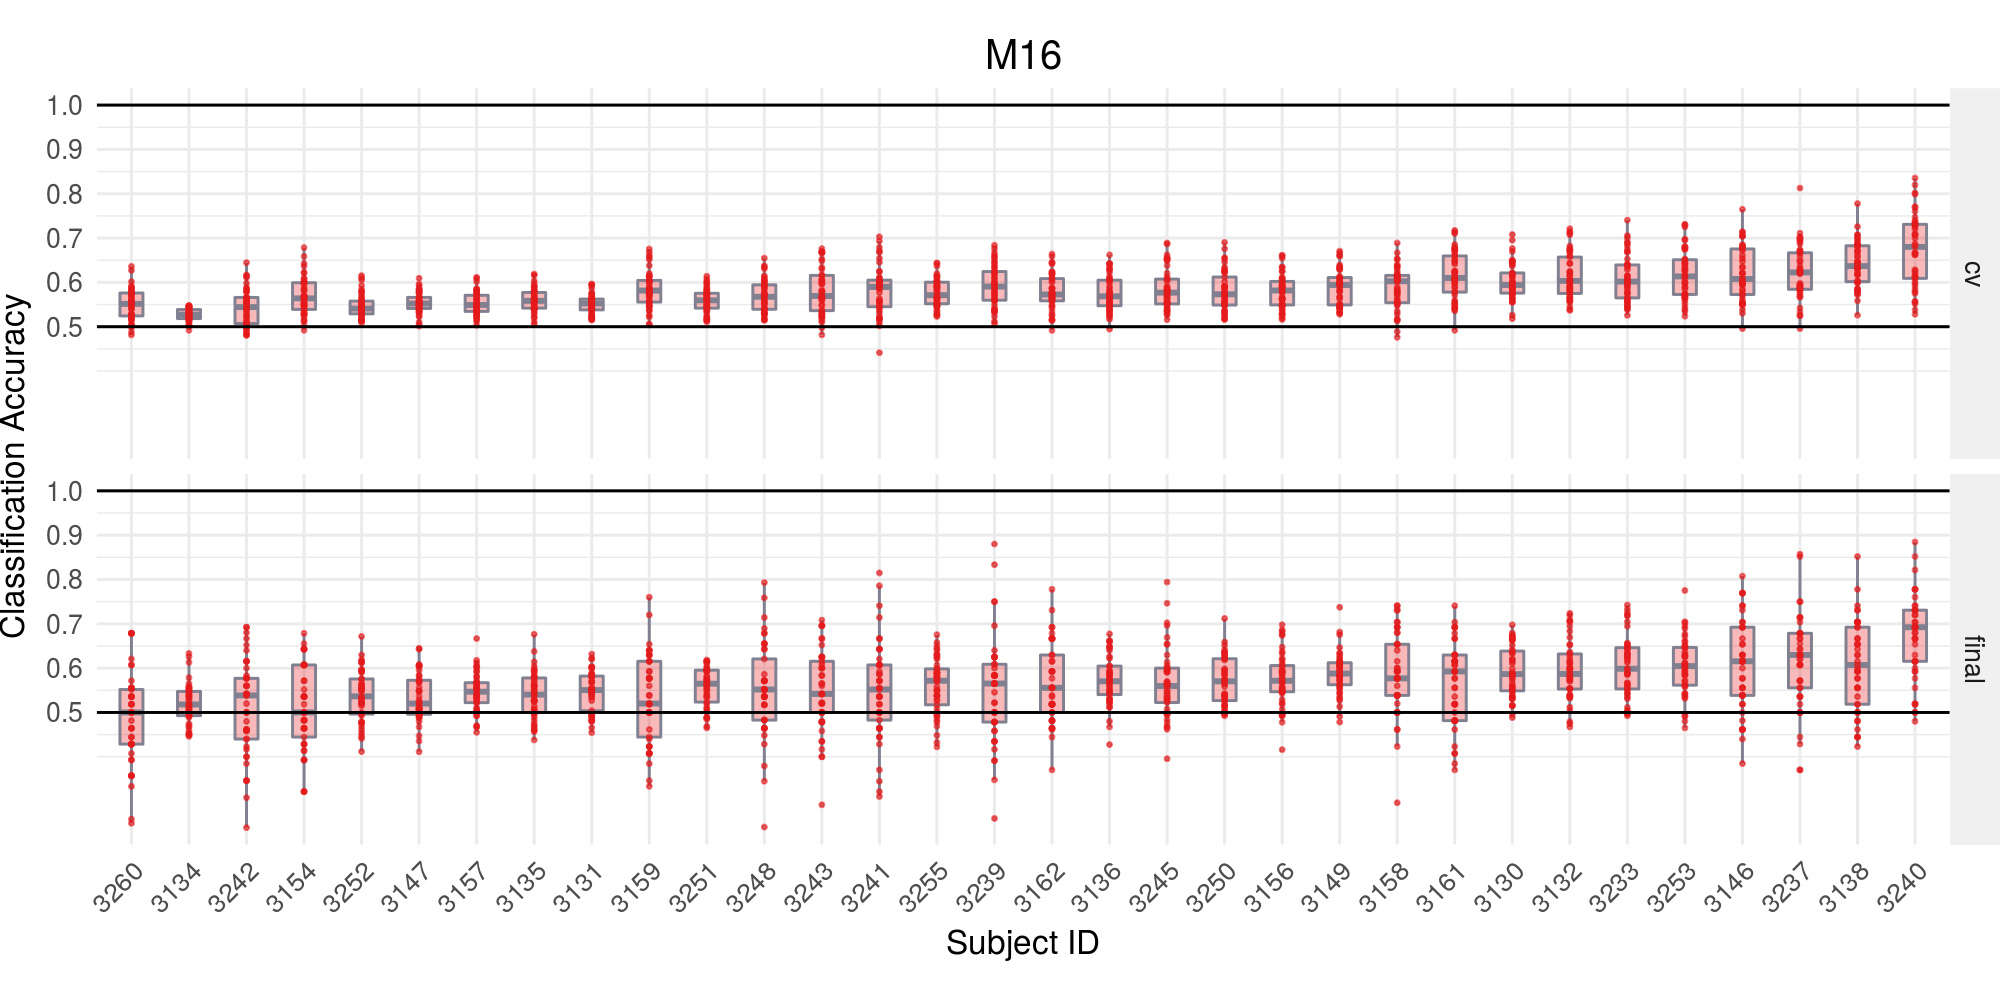

[1] "M23"
[1] "lda"


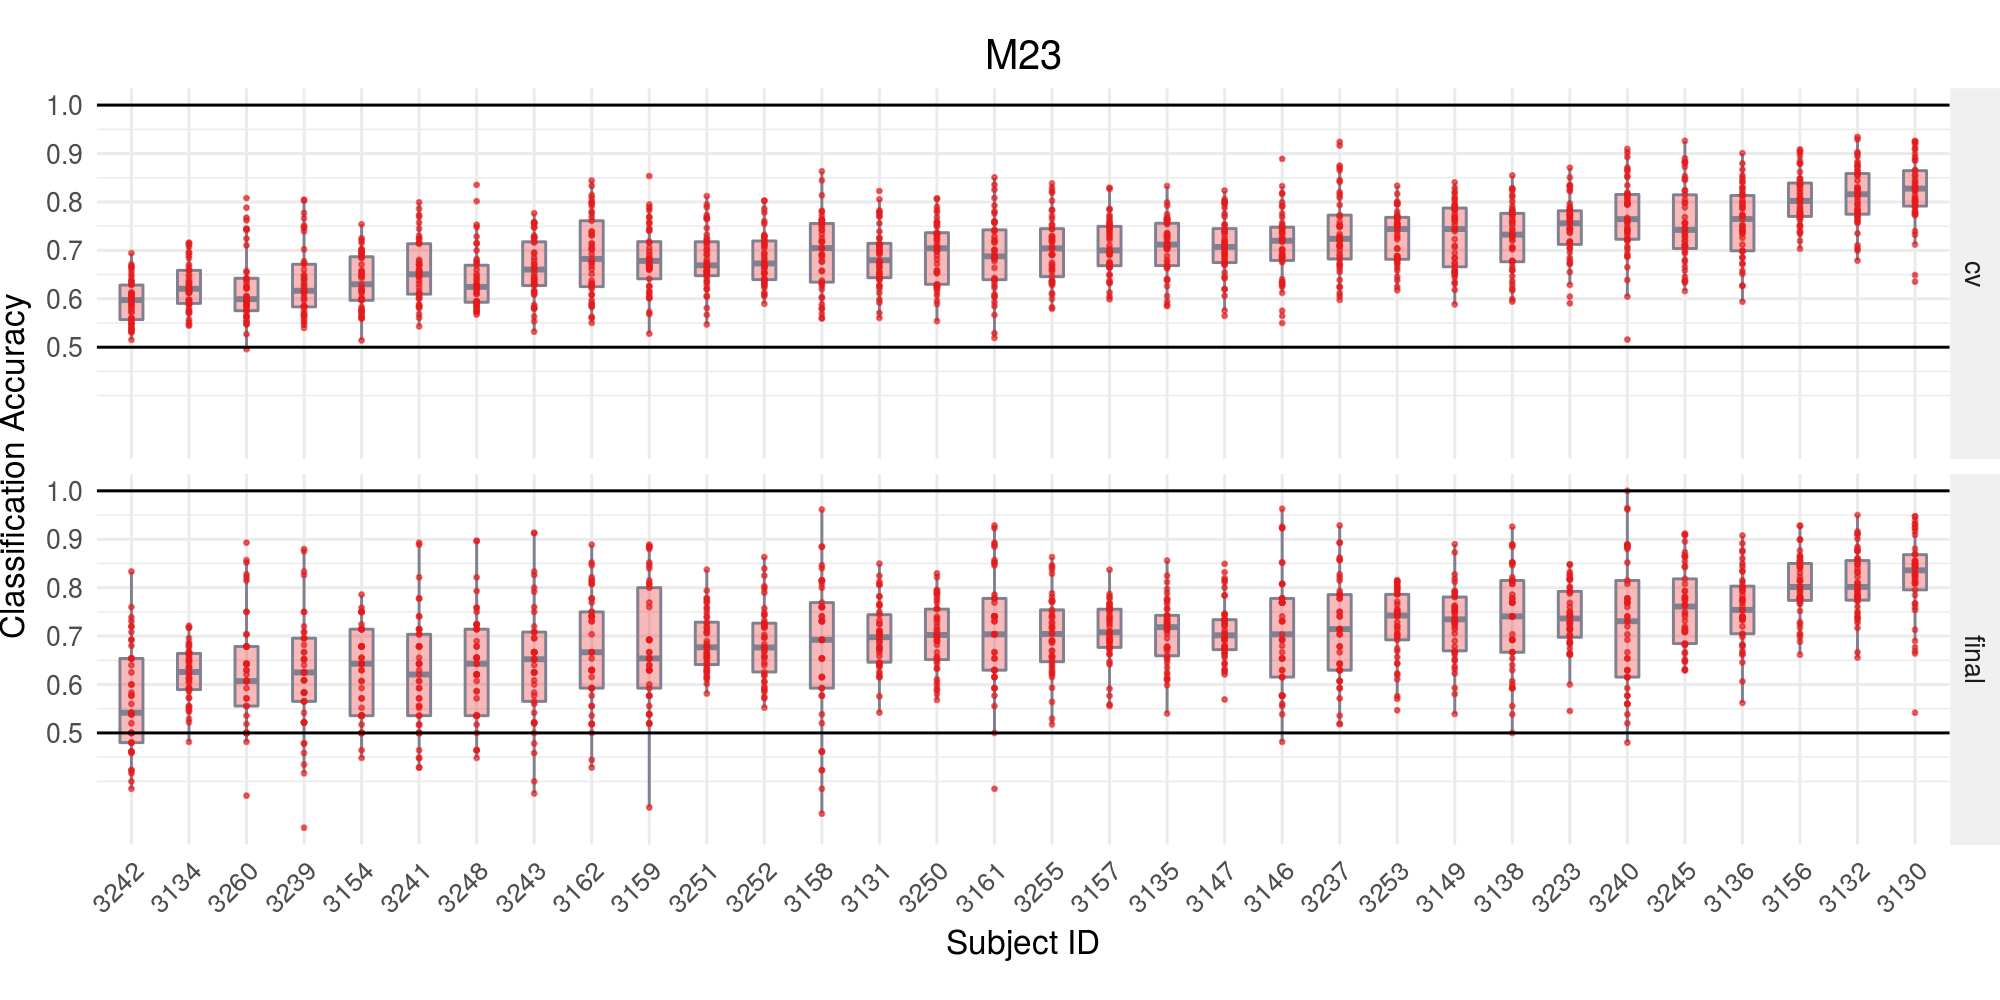

[1] "M35"
[1] "svc"


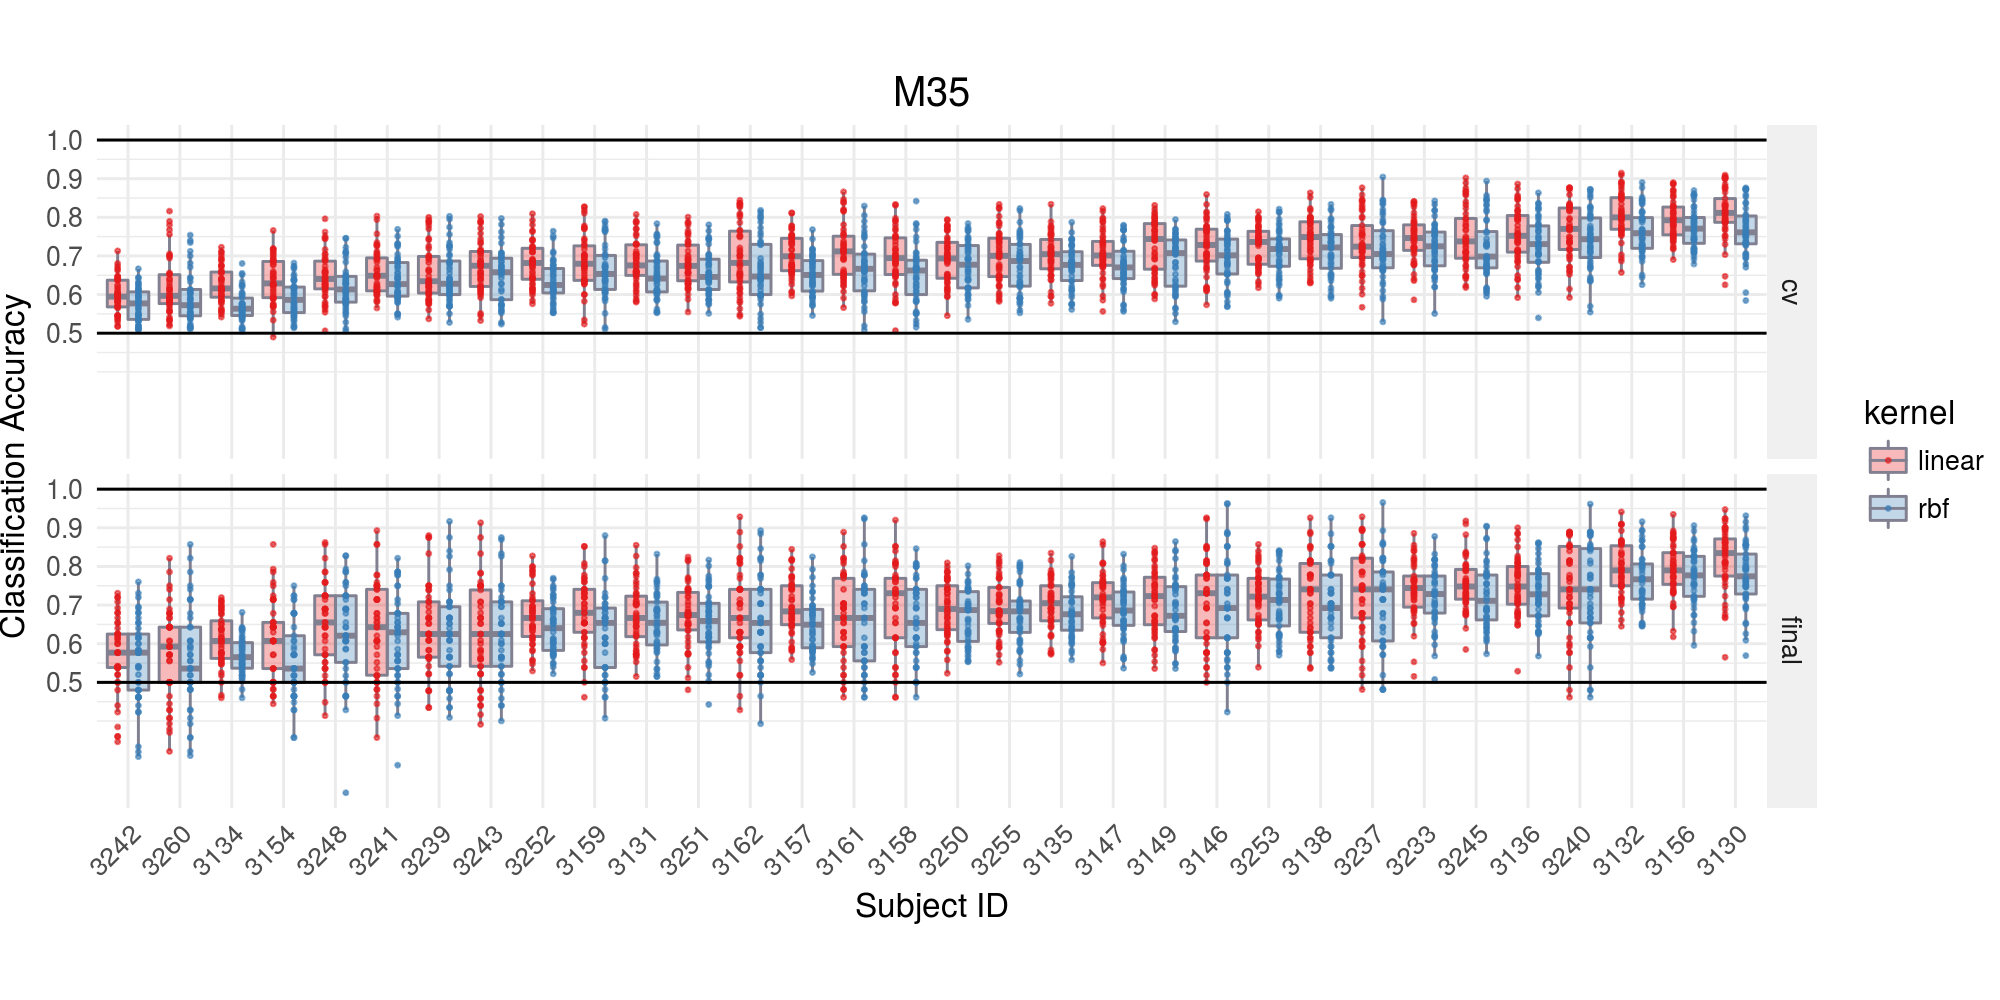

In [82]:
for(model in models){
    name <- unlist(strsplit(model, '_')[1])
    df <- dfvanilla
    df <- add_names(df)
    df <- df[df$modelname == model, ]
    df <- clean_df(df)
    group <- unique(df$group)
    df <- aggregate(score ~ d1+d2+subject+kernel+test+modelname, data=df, FUN=max)
    #df <- aggregate(score ~ d1+d2+subject, data=df, FUN=mean)
    df$subject <- factor(df$subject)
    
    print(model)
    print(group)
    
    p <- plot_model(df, name, model)
    ggsave(paste('plots/best',group,'.pdf', sep=''), plot = p, width = 10, height=5, dpi=200)
    ggsave(paste('plots/best',group,'.png', sep=''), plot = p, width = 10, height=5, dpi=200)
    display_png(file=paste('plots/best',group,'.png', sep=''))
}

##  Inspection and Description

In [ ]:
model <- 'M35'
name <- unlist(strsplit(model, '_')[1])
df <- dfvanilla
df <- add_names(df)
df <- df[df$modelname == model, ]
df <- clean_df(df)
group <- unique(df$group)

df <- aggregate(score ~ d1+d2+subject+test+modelname, data=df, FUN=max)
df <- aggregate(score ~ d1+d2+subject+kernel+test+modelname, data=df, FUN=max)
#df <- aggregate(score ~ d1+d2+subject, data=df, FUN=mean)
df$subject <- factor(df$subject)

subject <- '3242'
#kernel <- 'rbf'
#describe(df[df$test=='final' & df$subject==subject & df$kernel==kernel,]$score)
#describe(df[df$test=='cv' & df$subject==subject & df$kernel==kernel,]$score)

describe(df[df$test=='final' & df$subject==subject,]$score)
describe(df[df$test=='cv' & df$subject==subject,]$score)

describe(df[df$test=='final',]$score)
describe(df[df$test=='cv',]$score)

In [ ]:
dff <- aggregate(score ~ subject+test, data=df[df$test=='final',], FUN=sd)
dfcv <- aggregate(score ~ subject+test, data=df[df$test=='cv',], FUN=sd)
head(dff[with(dff, order(-score)), ],5)
head(dfcv[with(dfcv, order(-score)), ],5)

In [ ]:
dfm <- merge(dff, dfcv, by='subject')
dfm$meansd <- 0.5*(dfm$score.x + dfm$score.y)
dfm[with(dfm, order(-meansd)), ]

# 6. Digit Comparison

In [83]:
if(!exists('dfvanilla')){ dfvanilla <- read.csv('all_results.csv') }

[1] 3130 3132 3242 3260
[1] "M11"
  subject         0         1         2         3         4         5         6
1    3130 0.8800000 0.7633333 0.7344444 0.7088889 0.7655556 0.7155556 0.7555556
2    3132 0.8200000 0.7711111 0.7700000 0.6755556 0.7566667 0.6822222 0.7044444
3    3242 0.6911111 0.5277778 0.5688889 0.5422222 0.5555556 0.5477778 0.5355556
4    3260 0.6388889 0.5833333 0.5711111 0.5033333 0.5555556 0.5466667 0.5488889
          7         8         9
1 0.8000000 0.8000000 0.7677778
2 0.7877778 0.7633333 0.7111111
3 0.4911111 0.5844444 0.5000000
4 0.5422222 0.4788889 0.5311111


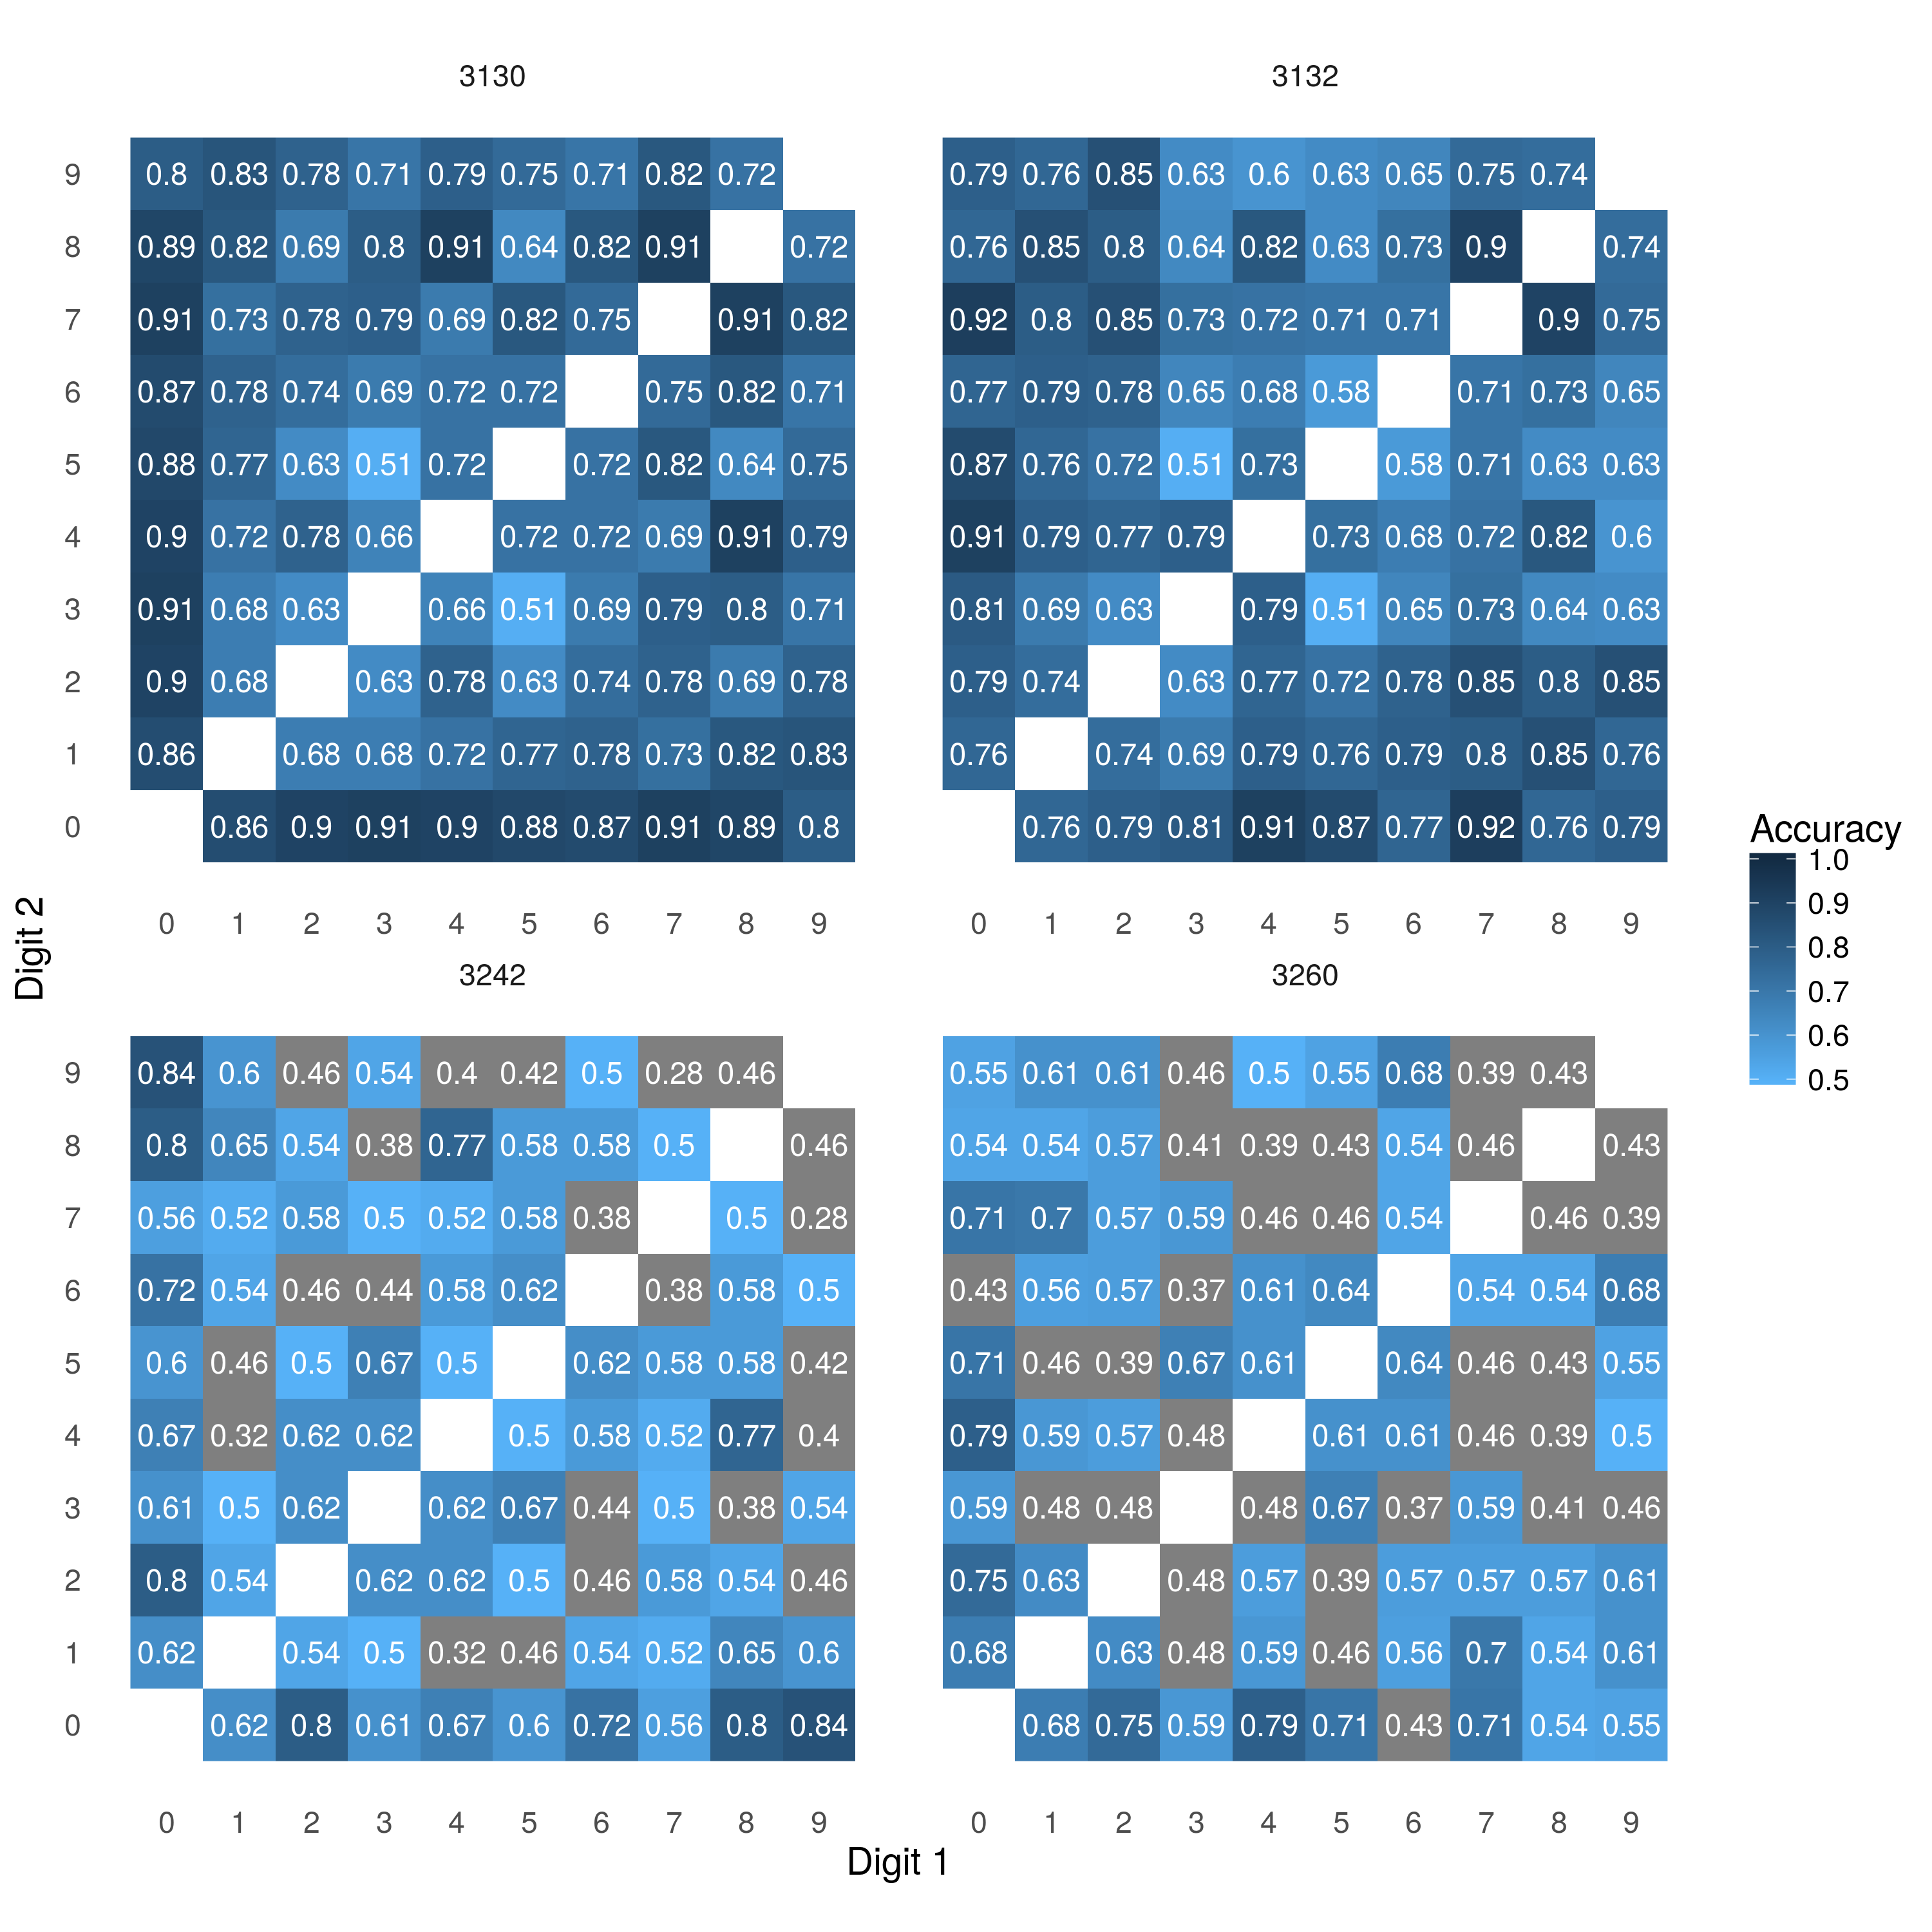

[1] 3240 3237 3154 3260
[1] "M16"
  subject         0         1         2         3         4         5         6
1    3240 0.7077778 0.6722222 0.6500000 0.6044444 0.7055556 0.7000000 0.6200000
2    3237 0.6744444 0.6711111 0.6055556 0.5744444 0.6155556 0.5633333 0.6266667
3    3154 0.5244444 0.4922222 0.5511111 0.4900000 0.5288889 0.5211111 0.5011111
4    3260 0.5000000 0.4666667 0.5177778 0.4444444 0.4877778 0.4955556 0.4766667
          7         8         9
1 0.6988889 0.6811111 0.6533333
2 0.5988889 0.6266667 0.5722222
3 0.4744444 0.5411111 0.4666667
4 0.5000000 0.4266667 0.5444444


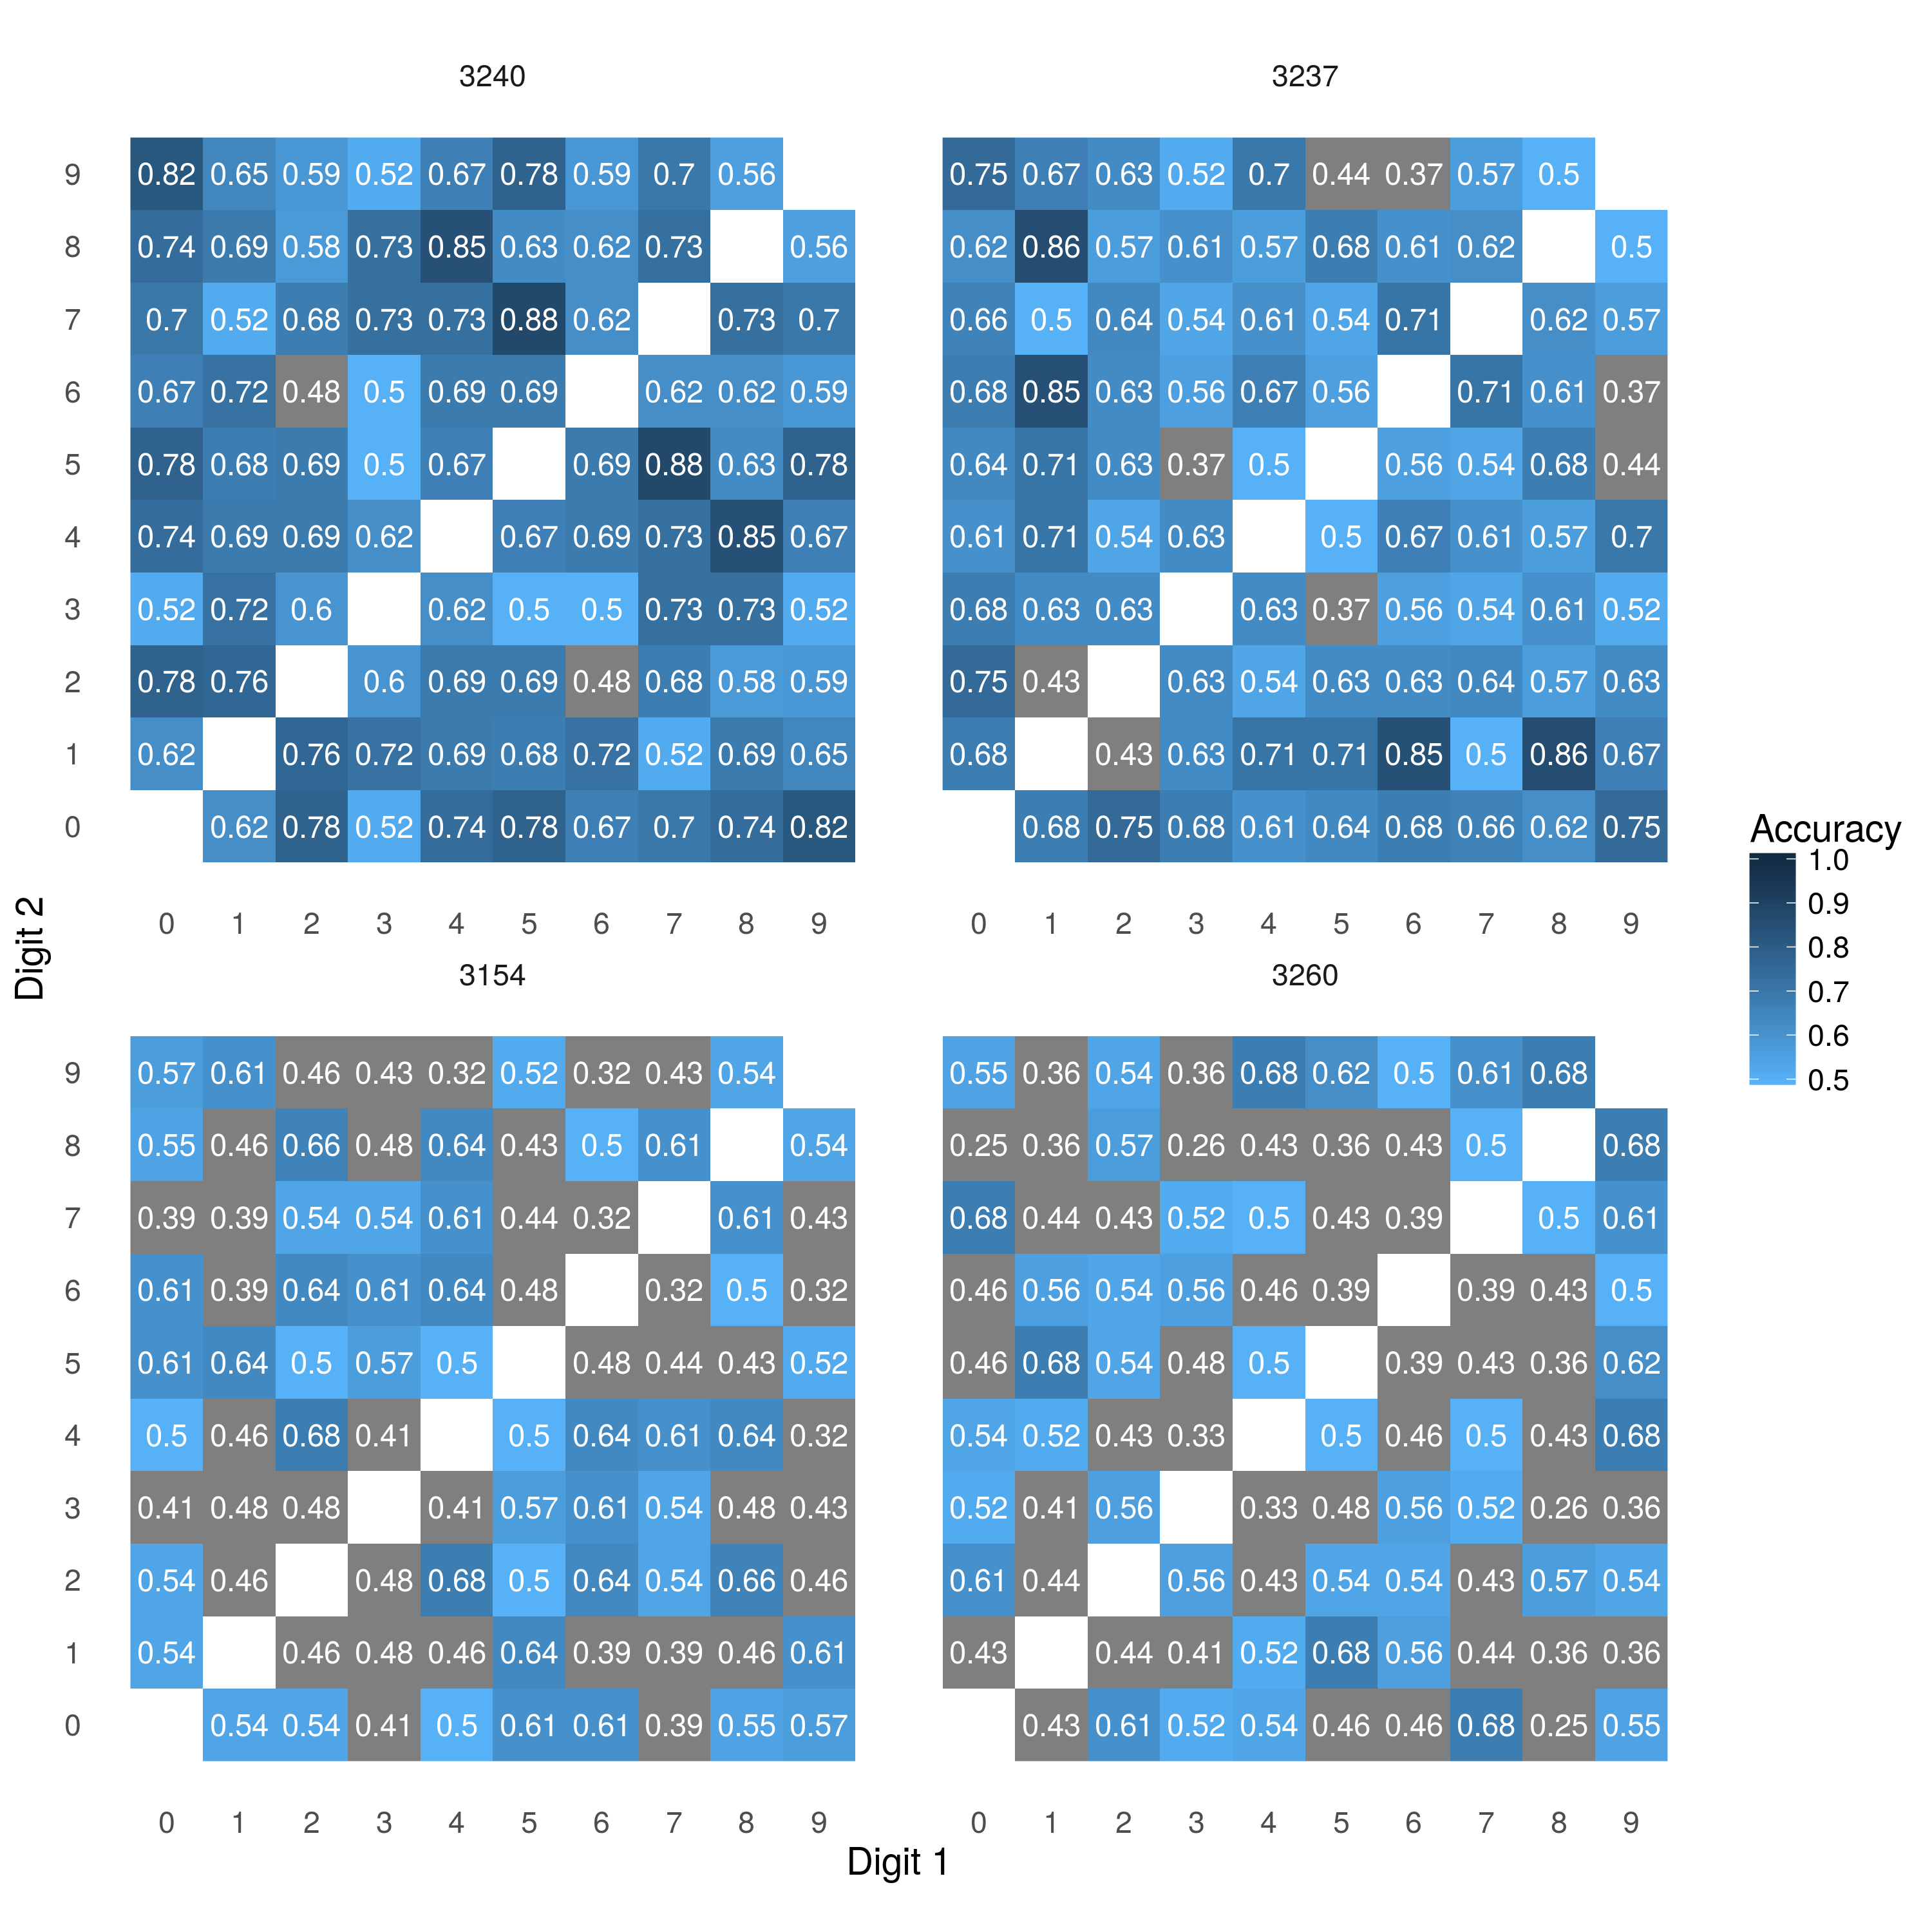

[1] 3130 3132 3239 3242
[1] "M23"
  subject         0         1         2         3         4         5         6
1    3130 0.9144444 0.8211111 0.7866667 0.7844444 0.8411111 0.7577778 0.8233333
2    3132 0.8844444 0.8222222 0.8000000 0.7933333 0.8333333 0.7700000 0.7677778
3    3239 0.7166667 0.6300000 0.6133333 0.5866667 0.6344444 0.5466667 0.6155556
4    3242 0.6744444 0.5188889 0.5788889 0.5922222 0.5866667 0.5444444 0.5522222
          7         8         9
1 0.8588889 0.8533333 0.8011111
2 0.8188889 0.8255556 0.7822222
3 0.6511111 0.6344444 0.5666667
4 0.5533333 0.5833333 0.5288889


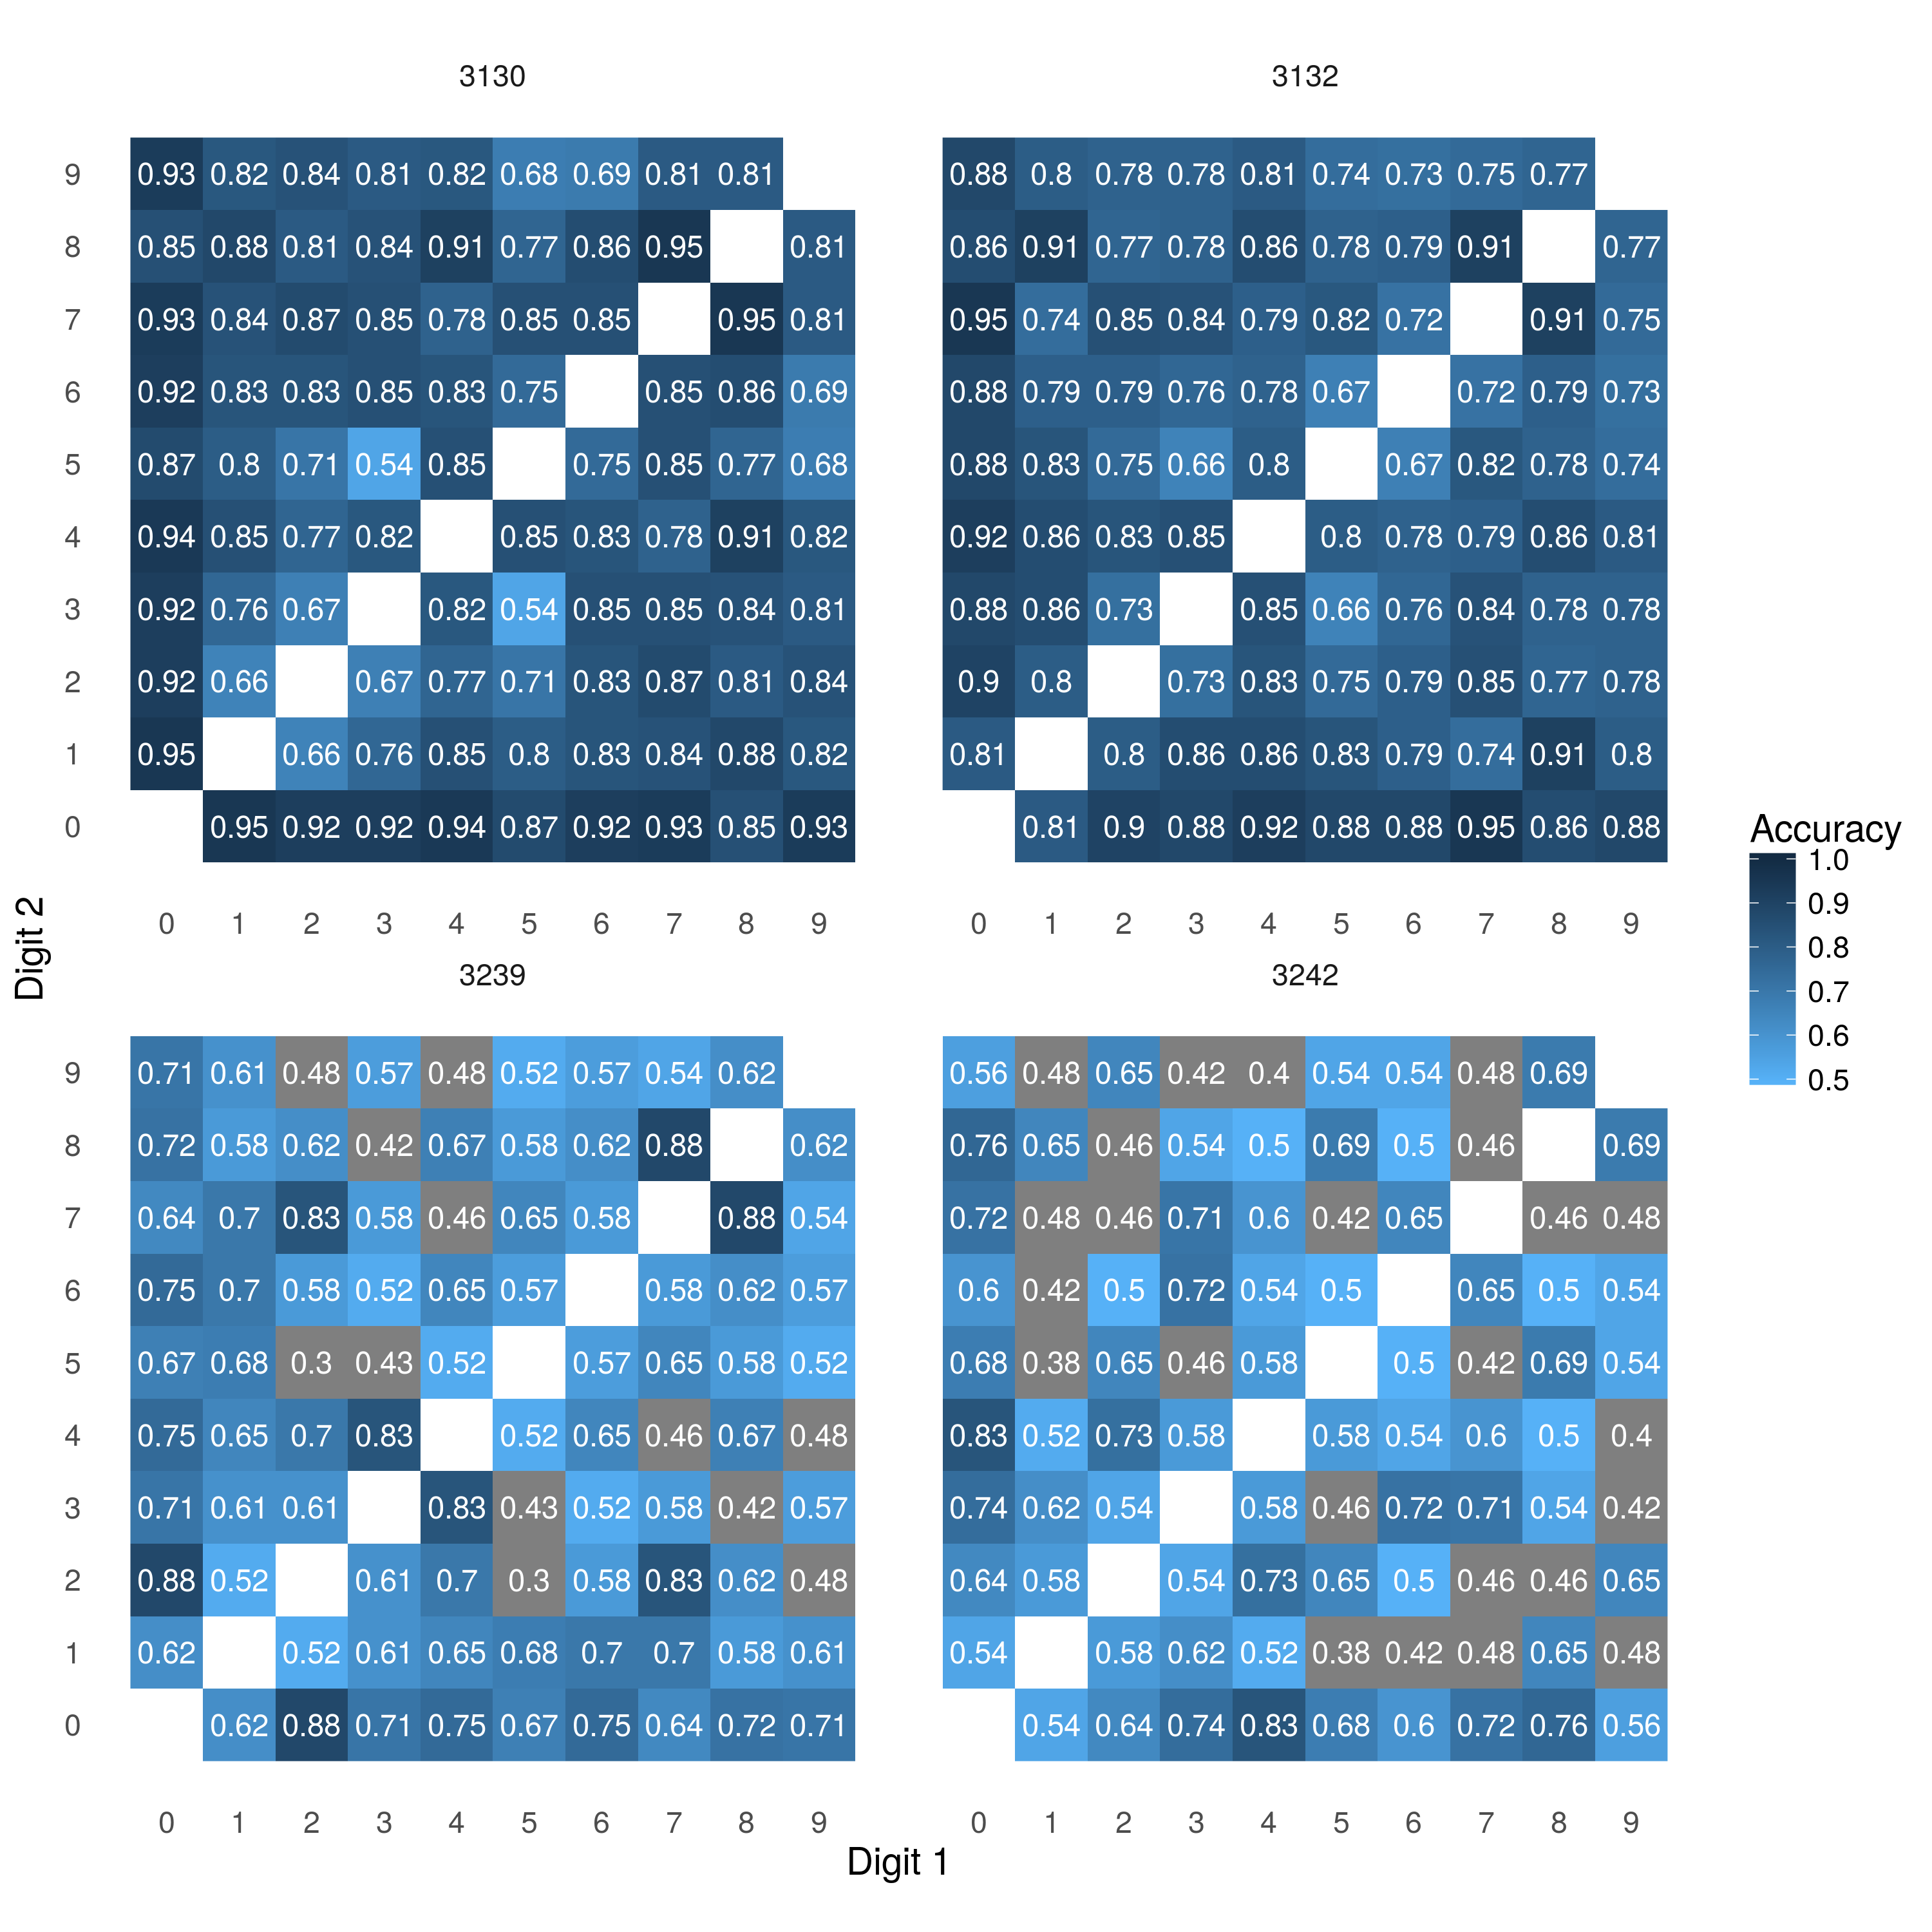

[1] 3130 3156 3260 3242
[1] "M35"
  subject         0         1         2         3         4         5         6
1    3130 0.8966667 0.8477778 0.7977778 0.7877778 0.8166667 0.7722222 0.8244444
2    3156 0.8766667 0.8033333 0.7855556 0.7688889 0.8033333 0.7644444 0.7811111
3    3260 0.7433333 0.5677778 0.5866667 0.5744444 0.5877778 0.5488889 0.5755556
4    3242 0.6388889 0.6055556 0.6144444 0.6022222 0.6155556 0.5766667 0.5755556
          7         8         9
1 0.8366667 0.8244444 0.8000000
2 0.8011111 0.8188889 0.7744444
3 0.6477778 0.5888889 0.6100000
4 0.6277778 0.5644444 0.5588889


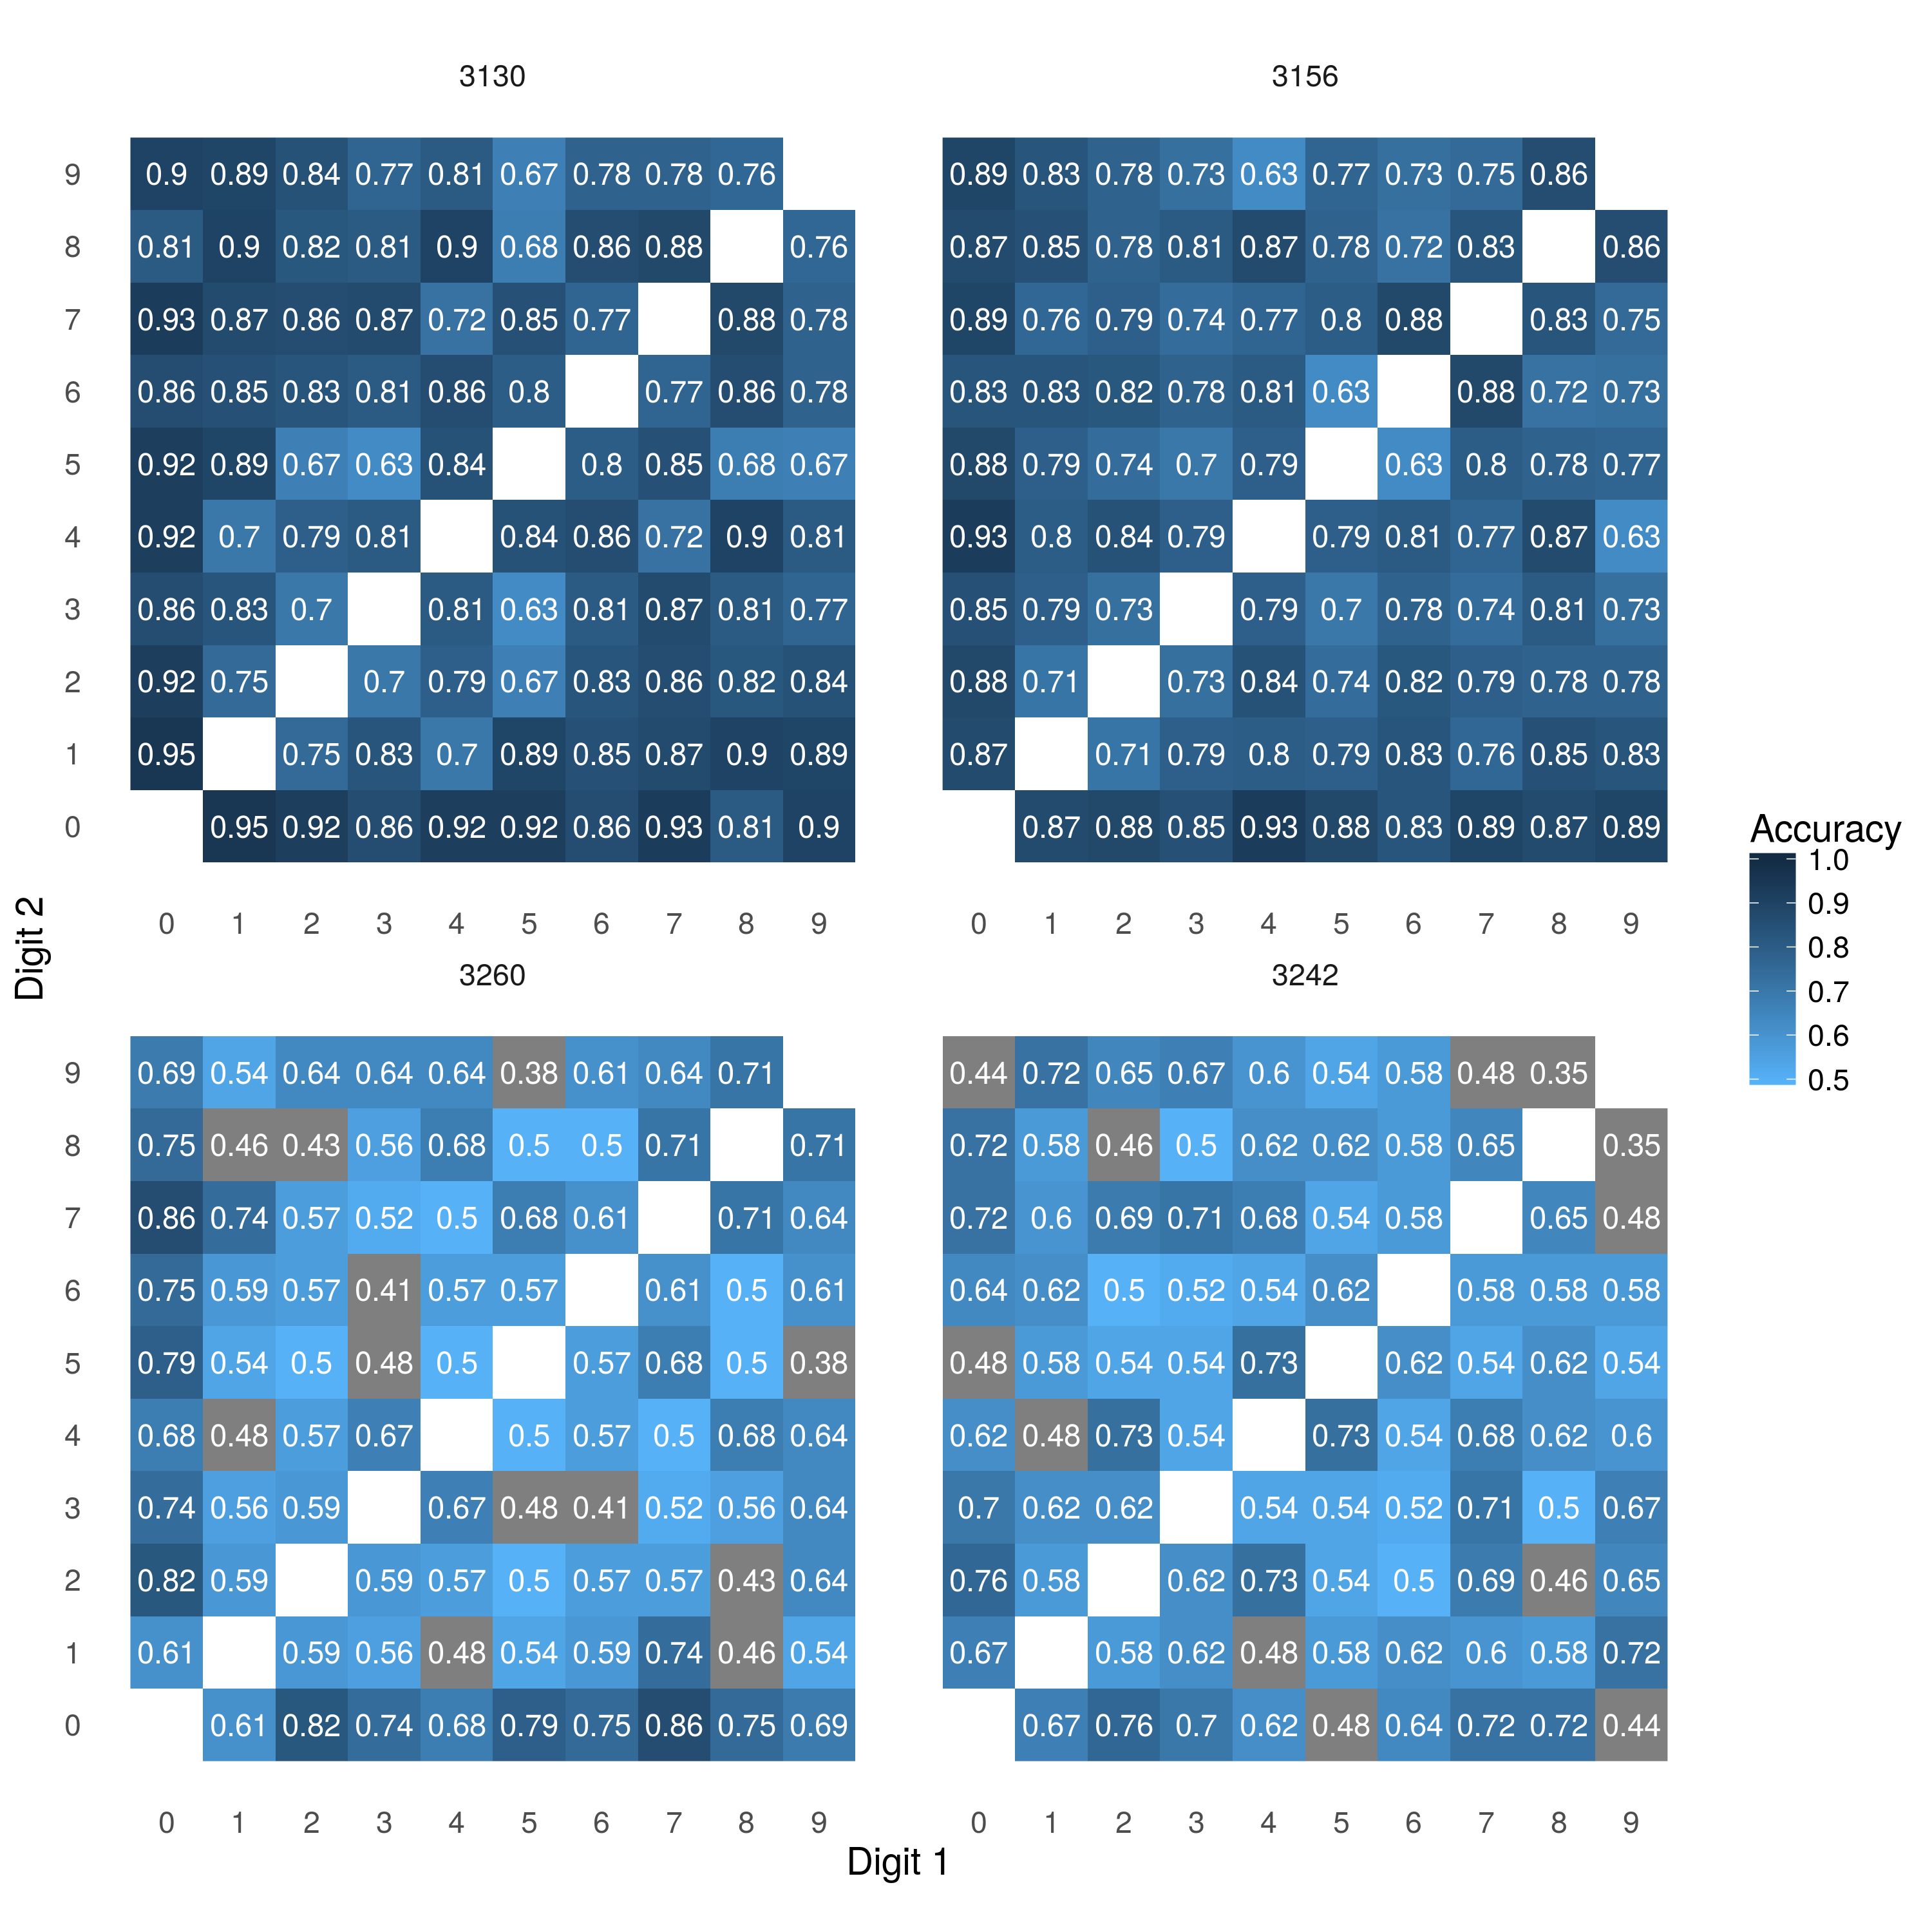

In [84]:
for(model in models){
    df <- dfvanilla[dfvanilla$test == 'final', ]
    # when we want to just look at one subject for a model
    df <- add_names(df)
    #df <- clean_df(df)

    df <- aggregate(score ~ d1+d2+subject+modelname, data=df, FUN=max)
    df <- df[df$modelname == model, ]
    
    # find 2 best and worst subjects for current model
    dfb <- aggregate(score ~ subject+modelname, data=df, FUN=mean)
    dfb <- dfb[with(dfb, order(-score)), ]
    bestworst <- c(head(dfb$subject, 2), tail(dfb$subject,2))
    print(bestworst)
    print(model)

    df <- aggregate(score ~ d1+d2+subject, data=df, FUN=max)
    df <- df[df$subject %in% bestworst,]
    #df <- aggregate(score ~ d1+d2, data=df, FUN=mean)
    #print(head(df))

    df <- mirror(df)
    df$subject <- factor(df$subject, levels=bestworst)
    
    # get mean digit score
    dft <- aggregate(score ~ d1+subject, data=df, FUN=mean)
    print(dcast(dft, subject ~ d1, value.var="score"))
    
    p <- ggplot(df, aes(d1, d2, fill=score))+
          geom_raster() +
          facet_wrap(~subject, scales="free_x", ncol=2) +
          scale_y_continuous(breaks=seq(0,9,1)) +
          scale_x_continuous(breaks=seq(0,9,1)) +
          scale_fill_gradient(limits=c(0.5,1.0), high="#132B43", low="#56B1F7") +
          geom_text(aes(label=score), color = "white", size = 4) +
          labs(fill='Accuracy',
               x='Digit 1',
               y='Digit 2') +
          theme_minimal() +
          theme(text = element_text(size=14),
                panel.grid.major = element_blank(),
                panel.grid.minor = element_blank(),
                aspect.ratio=1)

    ggsave(paste('plots/rdm',model,'.pdf',sep=''), plot = p, width = 10, height = 10, dpi=300)
    ggsave(paste('plots/rdm',model,'.png',sep=''), plot = p, width = 10, height = 10, dpi=300)
    display_png(file=paste('plots/rdm',model,".png",sep=''))
}

# 7. Individual vs Pooled Comparison

In [1]:
if(!exists('dfvanilla')){ dfvanilla <- read.csv('all_results.csv') }
if(!exists('dfpooledv')){ dfpooledv <- read.csv('results_pooled_final.csv') }

In [2]:
head(dfvanilla,2)

X d1 d2 kernel score     subject test
1 0 0  1  none   0.6064815 3242    cv  
2 1 0  1  none   0.6064815 3242    cv  
  type                                           
1 cspflatlda_ss4_201_700_fft_None_80_40bins_power
2 cspflatlda_ss4_201_700_fft_None_80_40bins_power

In [3]:
head(dfpooledv,2)

X d1 d2 group score     subject test
1 0 0  1  lda   0.7241511 pooled  cv  
2 1 0  1  lda   0.6829454 pooled  cv

In [4]:
models <- c('M11', 'M23', 'M35')

### Aggregation 1: as new 'pooled' models

In [62]:
# take the best CV-score as this makes up the best model
df <- aggregate(score ~ subject+type+d1+d2+test, data=dfvanilla, FUN=max)
df <- clean_df(df)
df <- df[df$modelname %in% models & df$test =='cv', ]
df[df$group=='cspflatlda',]$group <- 'csp'

In [63]:
df <- subset(df, select = c('subject', 'd1', 'd2', 'modelname', 'group', 'score'))

In [64]:
# mean over all subjects for each digit
df <- aggregate(score ~ d1+d2+modelname+group, data=df, FUN=mean)

In [65]:
head(df,2)

d1 d2 modelname group score    
1 0  1  M11       csp   0.7468541
2 0  2  M11       csp   0.7649788

In [66]:
head(dfpooledv, 2)

X d1 d2 group score     subject test
1 0 0  1  lda   0.7241511 pooled  cv  
2 1 0  1  lda   0.6829454 pooled  cv

In [67]:
dfpooled <- dfpooledv
dfpooled$group <- as.character(dfpooled$group)
dfpooled[dfpooled$group=='ldacsp',]$group <- 'csp'
dfpooled$modelname <- ''
dfpooled[dfpooled$group=='csp',]$modelname <- 'pool_M11'
dfpooled[dfpooled$group=='lda',]$modelname <- 'pool_M23'
dfpooled[dfpooled$group=='svc',]$modelname <- 'pool_M35'
dfpooled <- subset(dfpooled, select = c('d1', 'd2', 'modelname', 'score', 'group'))
dfpooled <- aggregate(score ~ d1+d2+modelname+group, data=dfpooled, FUN=mean)

In [68]:
dfboth <- rbind(df, dfpooled)

## plot

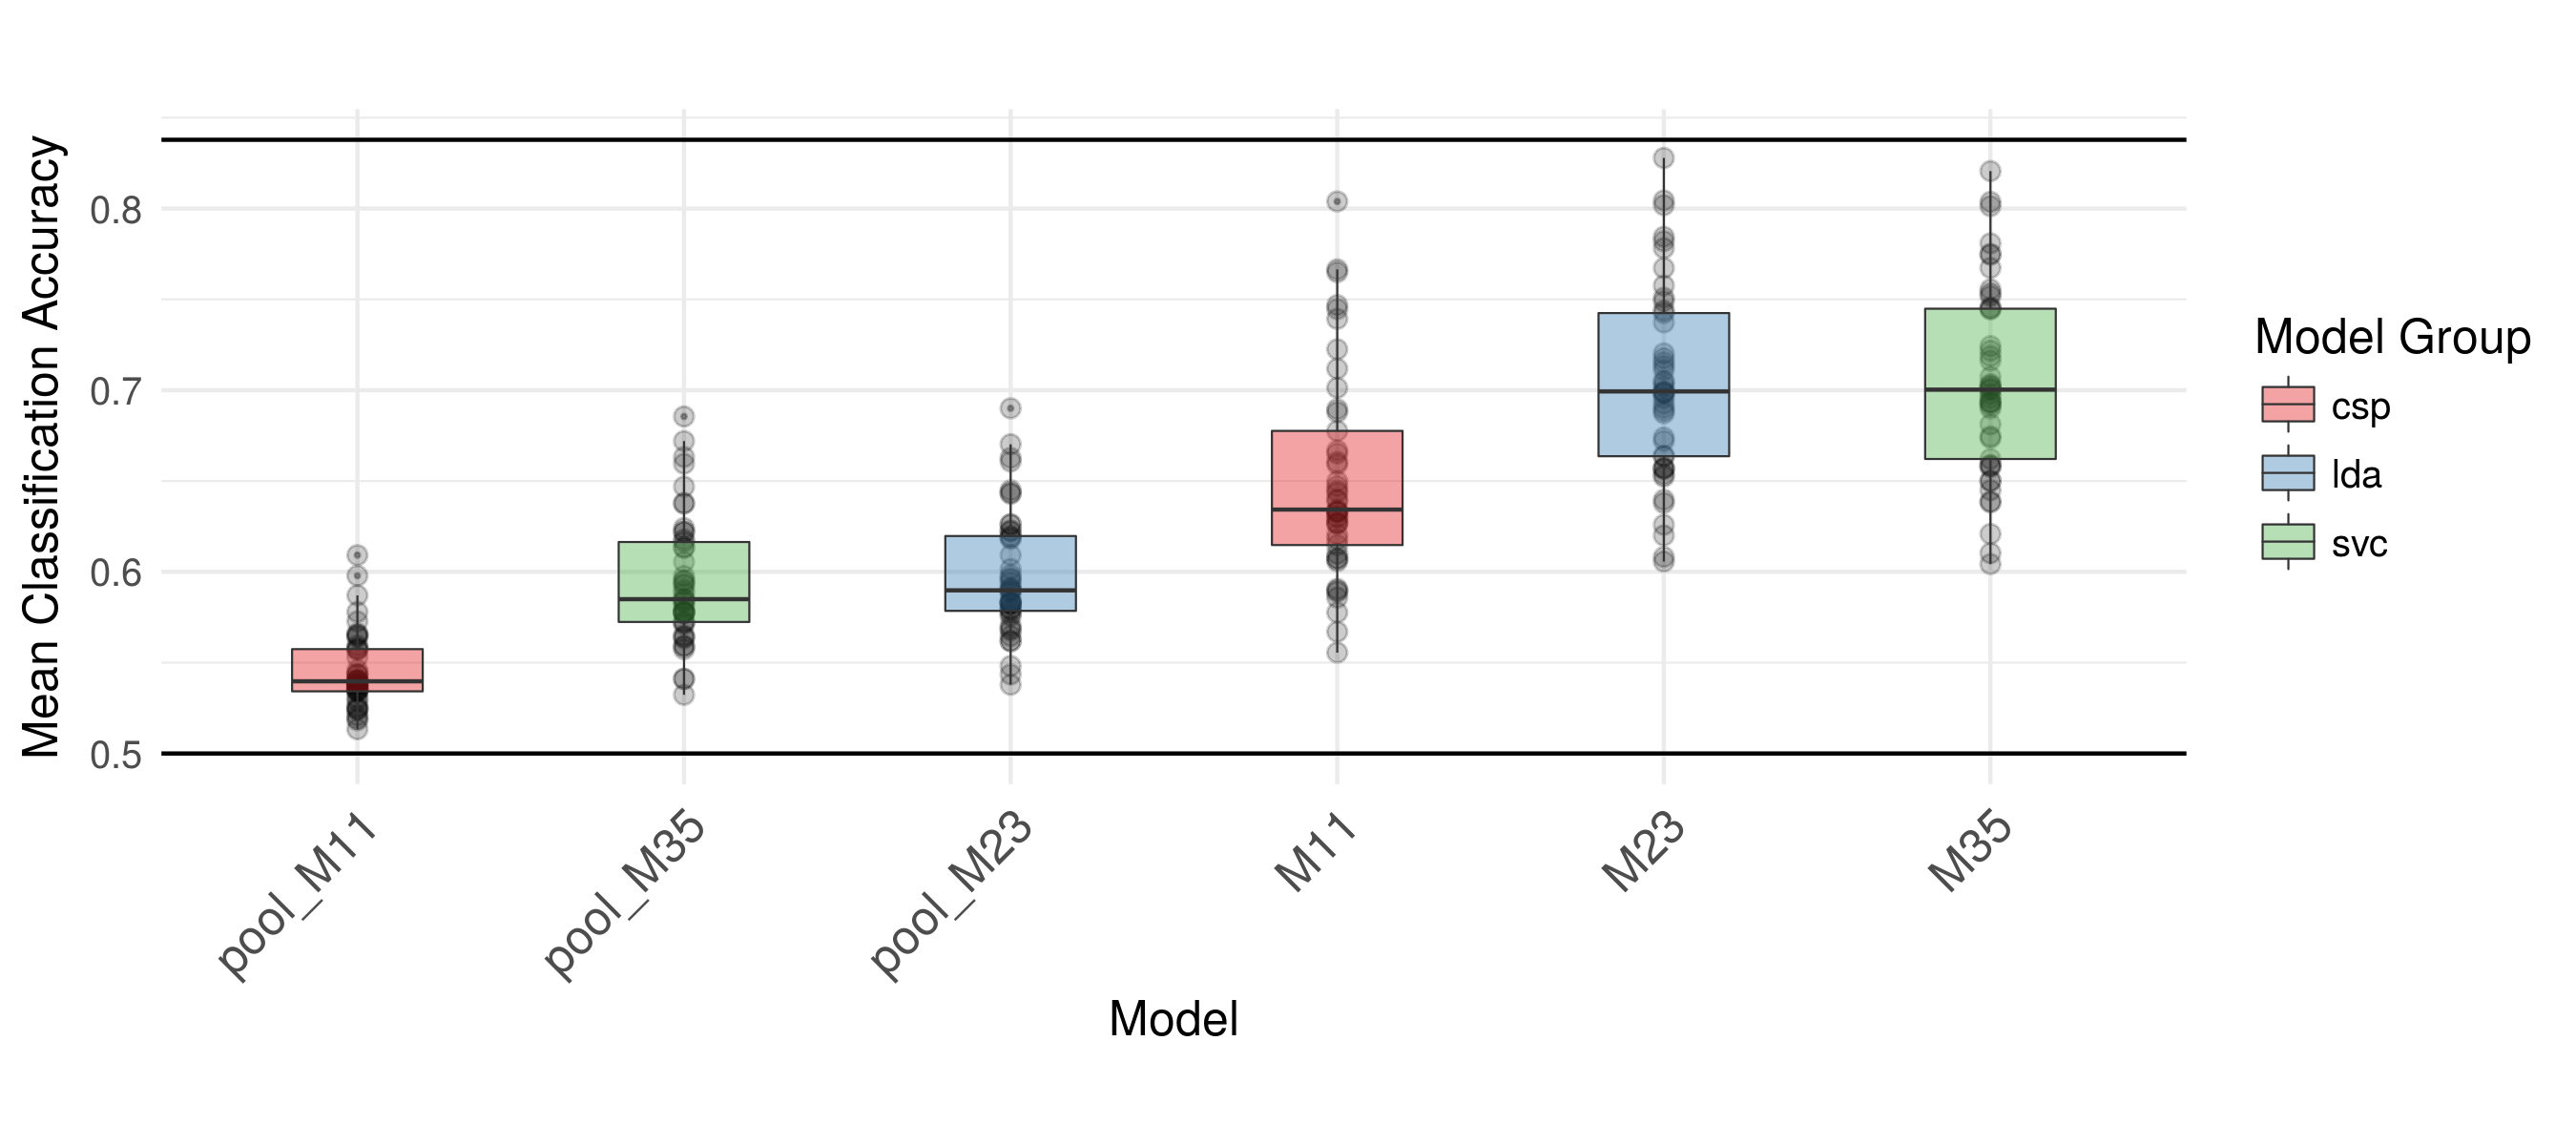

In [69]:
p <- ggplot(data=dfboth, aes(x=reorder(modelname, +score), y=score)) +
  geom_point(color='black', size=2, alpha=0.2) +
  geom_boxplot(aes(fill=group), outlier.size = NULL, alpha=0.4, width=0.4, size=0.25) +
  scale_y_continuous(limits=c(min(0.5,min(df$score)),max(df$score)+0.01), breaks=seq(0.5,1.0,0.1)) +
  scale_fill_brewer(type='qual', palette = "Set1", name='Model Group') +
  #facet_grid(test~.) +
  geom_hline(yintercept = max(df$score)+0.01) +
  geom_hline(yintercept = 0.5) +
  labs(x='Model',
       y='Mean Classification Accuracy')+
       #title='Model performance for all subjects') +
  theme_minimal() +
  theme(text = element_text(size=12),
        axis.text.x = element_text(angle=45, hjust=1, size=12),
        strip.background = element_rect(fill='#f0f0f0', linetype='blank'),
        aspect.ratio=1/3)
        

# workaround to set dpi of image in preview
ggsave("plots/pool_comparison_results.pdf", plot = p, width = 9, height = 4, dpi=300)
ggsave("plots/pool_comparison_results.png", plot = p, width = 9, height = 4, dpi=300)
display_png(file="plots/pool_comparison_results.png")

## Inspection and Description

In [70]:
aggregate(score ~ modelname, data=dfboth, FUN=mean)
aggregate(score ~ modelname, data=dfboth, FUN=sd)

modelname score    
1 M11       0.6507906
2 M23       0.7034083
3 M35       0.7043192
4 pool_M11  0.5451965
5 pool_M23  0.5983924
6 pool_M35  0.5949309

modelname score     
1 M11       0.05704266
2 M23       0.05384170
3 M35       0.05247115
4 pool_M11  0.02078558
5 pool_M23  0.03416648
6 pool_M35  0.03505288

## Aggregation 2: as a 'subject'

In [55]:
model <- 'M11'
# take the best CV-score as this makes up the best model
df <- aggregate(score ~ subject+type+d1+d2+test, data=dfvanilla, FUN=max)
df <- clean_df(df)
df <- df[df$modelname == model & df$test =='cv', ]
df$kernel <- 'none'

In [56]:
head(df,1)

subject type                                              d1 d2 test
321 3130    cspflatlda_ss4_201_700_fft_None_80_40bins_nopower 0  1  cv  
    score     group      modelname kernel
321 0.8907563 cspflatlda M11       none

In [57]:
dfpooled <- subset(dfpooledv, select = c('subject', 'd1', 'd2', 'group', 'score', 'test'))

In [58]:
head(dfpooled,1)

subject d1 d2 group score     test
1 pooled  0  1  lda   0.7241511 cv

In [59]:
dfpooled$type <- 'pooled'
dfpooled$modelname <- model
dfpooled$kernel <- 'pooled'

In [60]:
dfpooled <- dfpooled[dfpooled$group=='ldacsp',]

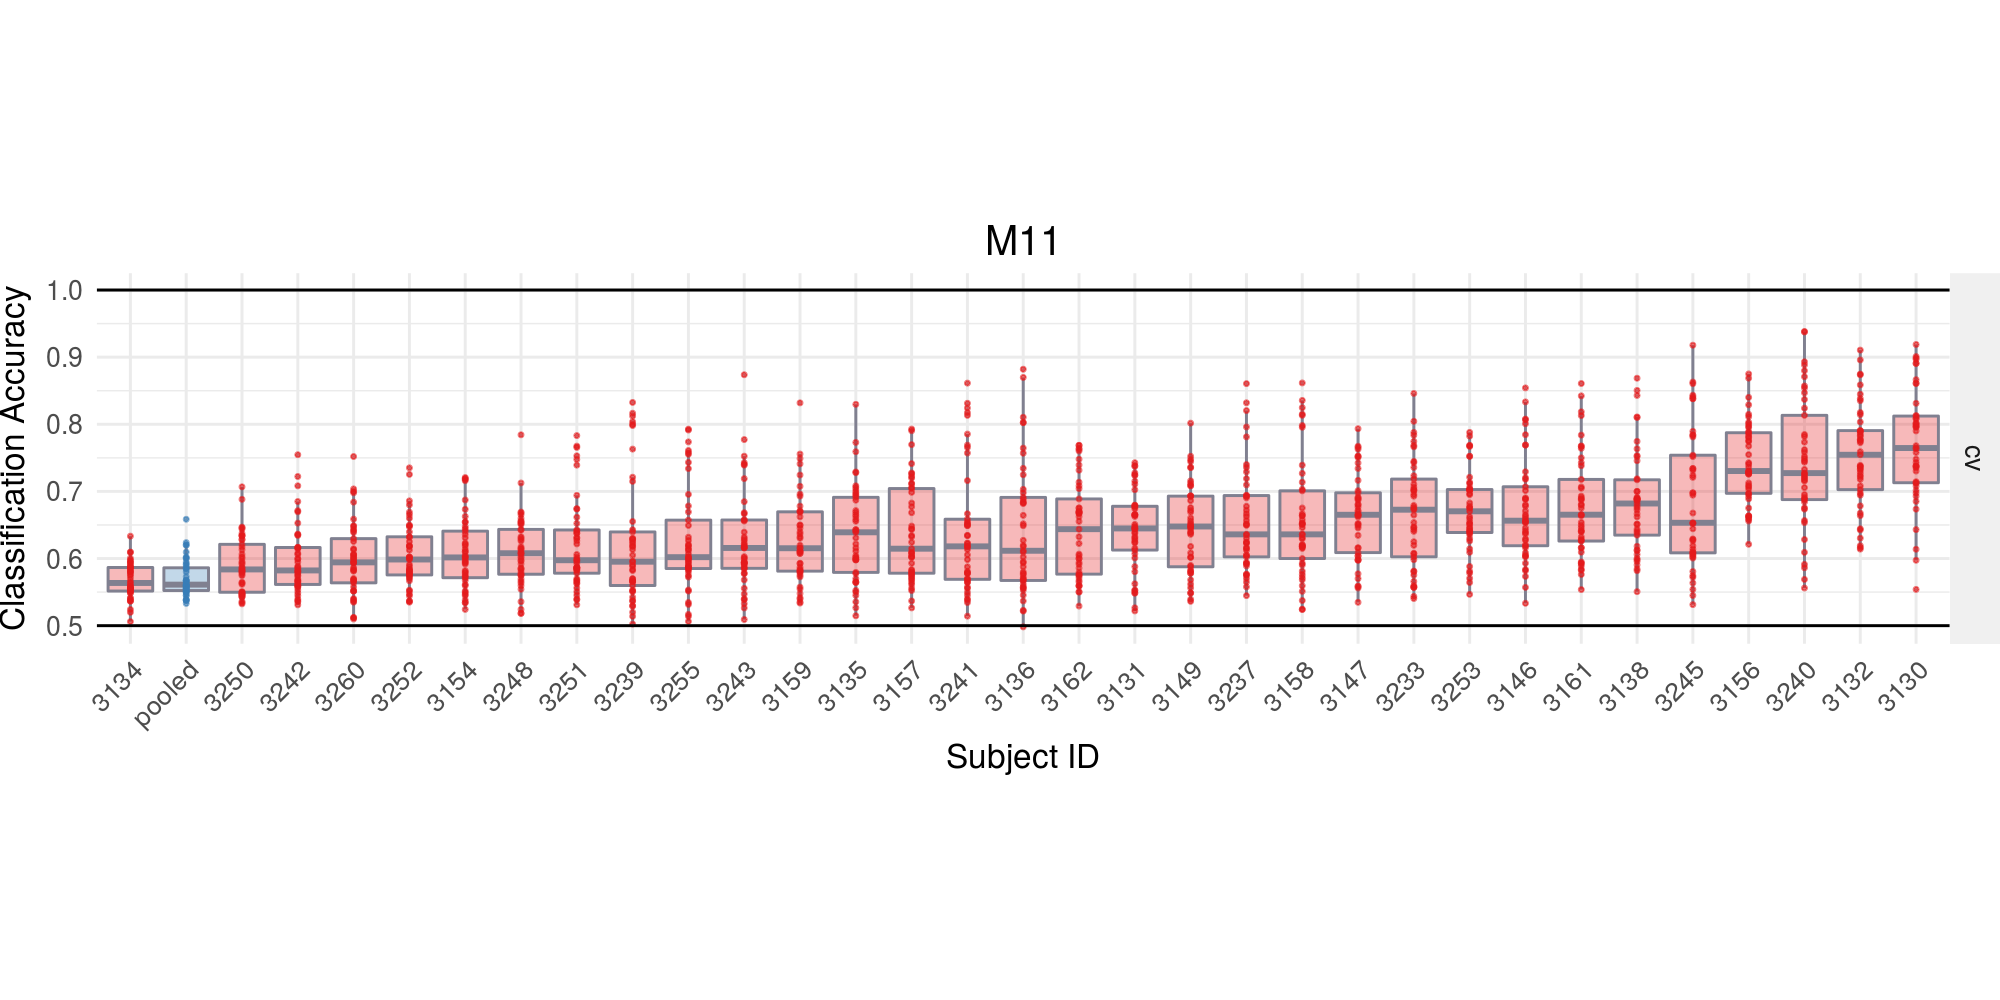

In [61]:
name <- unlist(strsplit(model, '_')[1])
df <- rbind(df, dfpooled)
df <- aggregate(score ~ d1+d2+subject+test+modelname+kernel, data=df, FUN=max)
#df <- aggregate(score ~ d1+d2+subject, data=df, FUN=mean)
df$subject <- factor(df$subject)

p <- plot_model(df, '', model, no_guide=TRUE)
ggsave(paste('plots/pooled_',model,'.pdf', sep=''), plot = p, width = 10, height=5, dpi=200)
ggsave(paste('plots/pooled_',model,'.png', sep=''), plot = p, width = 10, height=5, dpi=200)
display_png(file=paste('plots/pooled_',model,'.png', sep=''))

---